In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm
import host_galaxy_enhancement_plots as hostplot

In [3]:
plt.style.use(["science"])

In [4]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/'

TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])

#TNG_50_pop = h5py.File('/home/pranavsatheesh/host_galaxies/data/population_files/new/TNG50-1_population_sort_gas-000_dm-000_star-1000_bh-001_w_rsep_cut_1bh.hdf5','r')
TNG_50_control = control.control_samples_TNG(TNG_50_pop)
TNG_color = '#d95f02'

brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: '#bdc9e1', brahma_simName_array[1]: '#67a9cf', brahma_simName_array[2]: '#1c9099', brahma_simName_array[3]: '#016c59'}
brahma_sim_obj = {}
brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control
    #brahma_sim_zbin_width,brahma_sim_zbins[sim] =hostplot.find_best_z_width(brahma_control.z_merging_pop,z_min=0,z_max=10,z_width_initial=0.2)
    brahma_sim_zbins[sim] = hostplot.find_adaptive_z_bins(brahma_control.z_merging_pop,z_min=0,z_max=12,zbin_width=0.3,min_N_values=5)
    print(sim,brahma_sim_zbins[sim])


TNG_50_zbins = hostplot.find_adaptive_z_bins(TNG_50_control.z_merging_pop,z_min=0,z_max=10,zbin_width=0.3,min_N_values=40)
print('TNG50',TNG_50_zbins )
brahma_zbins = hostplot.find_brahma_adaptive_z_bins(brahma_sim_obj,brahma_simName_array,z_lower=0,z_max=15,zbin_width=0.4,min_N_values=10)
print('Brahma common zbins:',brahma_zbins)


processing each merger redshifts for controls:   0%|          | 0/83 [00:00<?, ?it/s]

processing each merger redshifts for controls: 100%|██████████| 83/83 [00:02<00:00, 41.43it/s]
/home/pranavsatheesh/host_galaxies/notebooks/../py_files/control_sample.py:378: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of available mergers in this population is 504
Number of cases where a close enough match is not found within the acceptable tolerance: 14


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 26.55it/s]
/home/pranavsatheesh/host_galaxies/notebooks/../py_files/control_sample.py:953: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of cases where a close enough match is not found within the acceptable tolerance: 110
number of processable mergers with valid controls:
664
[32, 47, 53, 95, 97, 138, 97, 48, 33, 17, 7]
SM5_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 31.23it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 104
number of processable mergers with valid controls:
539
[24, 33, 51, 72, 69, 96, 88, 52, 31, 16, 5]
SM5_LW10_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1]


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 46.09it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 80
number of processable mergers with valid controls:
405
[28, 22, 29, 41, 44, 91, 59, 35, 26, 19, 6, 5]
SM5_LW10_LOWSPIN_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1 9.1]


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 116.67it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 49
number of processable mergers with valid controls:
127
[9, 7, 5, 15, 14, 25, 12, 17, 11, 5, 5]
SM5_LW10_LOWSPIN_RICH_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]
[55, 57, 54, 43, 56, 40, 46, 48, 50]
TNG50 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.5 3.1]
Brahma common zbins: [0.  0.4 1.  1.6 2.2 3.1 4.1 5.1 8.1]


In [5]:
sim_names = brahma_simName_array + ['TNG50']
sim_colors = [brahma_sim_colors[sim] for sim in brahma_simName_array] + [TNG_color]
sim_objs = brahma_sim_obj
sim_objs['TNG50'] = TNG_50_control
sim_zbins_list = [brahma_zbins for _ in brahma_simName_array] + [TNG_50_zbins]

In [6]:
print(dir(sim_objs['TNG50']))

['MBH_control_pop', 'MBH_merging_pop', 'MBH_not_zero_flag', 'Mdot_control_pop', 'Mdot_merging_pop', 'MgasInRad', 'MgasInRad_progs', 'Mgas_control_pop', 'Mgas_merging_pop', 'MstarInRad', 'MstarInRad_progs', 'Mstar_control_pop', 'Mstar_merging_pop', 'Msubhalo_control_pop', 'Msubhalo_merging_pop', 'N_mergers', 'SFR_control_pop', 'SFR_merging_pop', 'StellarHalfmassRad_control_pop', 'StellarHalfmassRad_merging_pop', 'StellarHalfmassRad_progs', 'SubhaloPhotoMag_control_pop', 'SubhaloPhotoMag_merging_pop', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compute_population_properties', 'control_available_flag', 'fgas_control_pop', 'fgas_evolution', 'fgas_post_merger', 'fgas_progs', 'find_control_sample

In [7]:
sim_objs['TNG50'].Msubhalo_merging_pop = sim_objs['TNG50'].Msubhalo_merging_pop*1e10/0.6774  # Converting to Msun

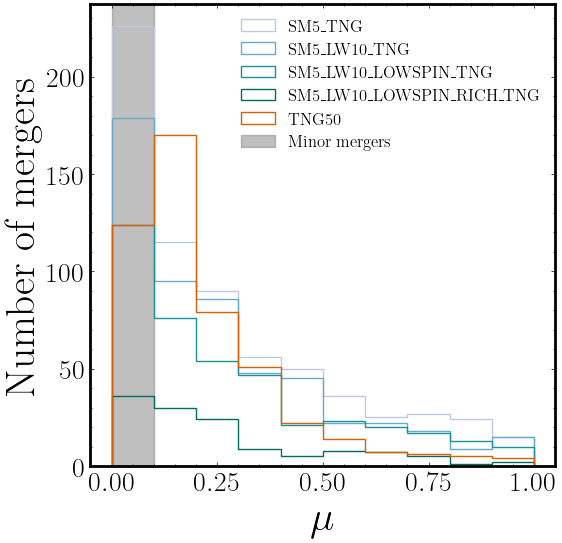

In [8]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=12)
fig,ax = plt.subplots(1,1,figsize=(6,6),sharex=True)
for i,sim in enumerate(sim_names):
    ax.hist(sim_objs[sim].q_merger,bins=10,range=(0,1),histtype='step',color=sim_colors[i],label=sim)
ax.set_xlabel('$\mu$')
ax.set_ylabel('Number of mergers')

#shade the 0-0.1 region 
ax.axvspan(0, 0.1, color='gray', alpha=0.5,label='Minor mergers')
ax.legend()
# ax.set_title('Mass ratio')

/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type

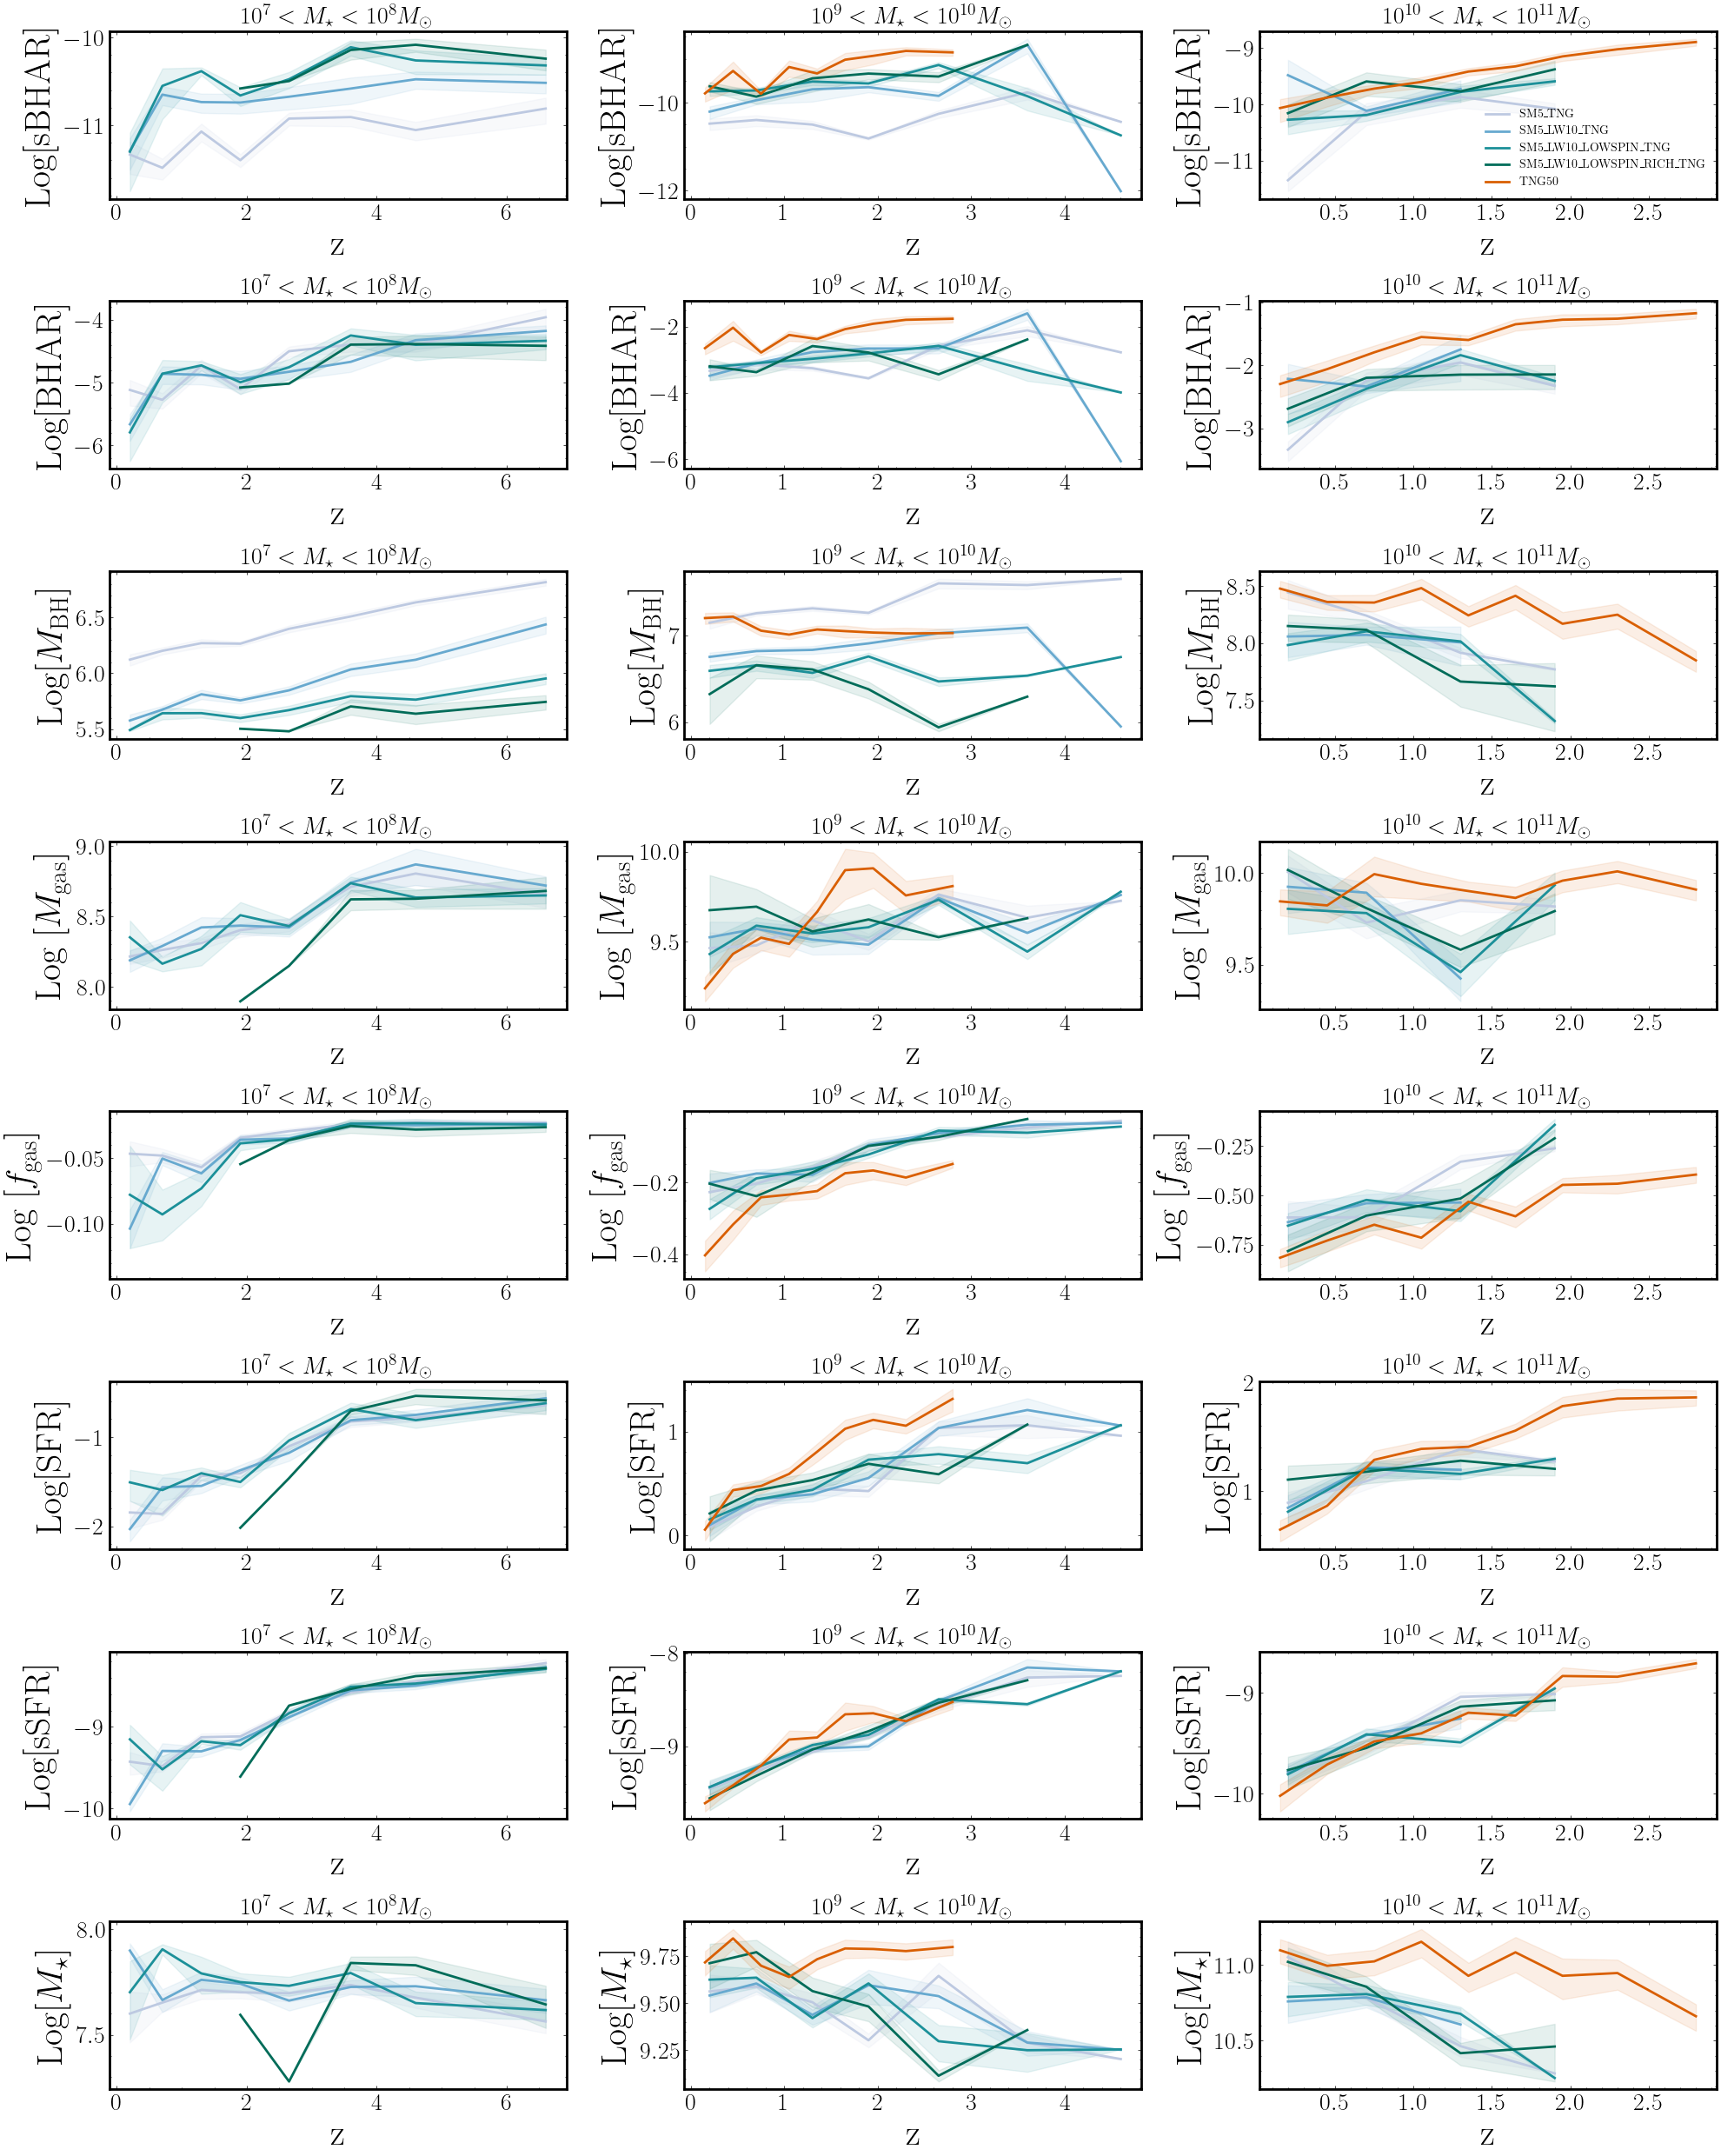

In [9]:
fig,axes = plt.subplots(8,3,figsize=(20,25))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=10)


quantities_list = ['sBHAR_merging_pop','Mdot_merging_pop','MBH_merging_pop','MgasInRad','fgas_progs','SFR_merging_pop','sSFR_merging_pop','Mstar_merging_pop']
quantities_labels = ['Log[sBHAR]','Log[BHAR]',r'Log[$M_{\rm BH}$]',r'Log [$M_{\rm gas}$]',r'Log [$f_{\rm gas}$]','Log[SFR]','Log[sSFR]','Log[$M_{\star}$]']  

Mstar_lower = 10**7
Mstar_upper = 10**(8)

for i,quantities in enumerate(quantities_list):
    ax = hostplot.plot_evolution_z_w_Mstar_interval_for_sim(axes[i,0],Mstar_lower,Mstar_upper,sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name=quantities,plot_log10=True)
    ax.set_ylabel(quantities_labels[i])
    ax.set_xlabel("z")
    ax.set_title(r"$10^7 < M_{\star} < 10^8 M_{\odot}$")

Mstar_lower = 10**(9)
Mstar_upper = 10**(10)

for i,quantities in enumerate(quantities_list):
    ax = hostplot.plot_evolution_z_w_Mstar_interval_for_sim(axes[i,1],Mstar_lower,Mstar_upper,sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name=quantities,plot_log10=True)
    ax.set_ylabel(quantities_labels[i])
    ax.set_xlabel("z")
    ax.set_title(r"$10^9 < M_{\star} < 10^{10} M_{\odot}$")

Mstar_lower = 10**10
Mstar_upper = 10**12

for i,quantities in enumerate(quantities_list):
    ax = hostplot.plot_evolution_z_w_Mstar_interval_for_sim(axes[i,2],Mstar_lower,Mstar_upper,sim_objs,sim_zbins_list,sim_names,sim_colors,quantity_name=quantities,plot_log10=True)
    ax.set_ylabel(quantities_labels[i])
    ax.set_xlabel("z")
    if i==0:
        ax.legend()
    ax.set_title(r"$10^{10} < M_{\star} < 10^{11} M_{\odot}$")
fig.tight_layout()


In [10]:
print(dir(sim_objs['TNG50']))

['MBH_control_pop', 'MBH_merging_pop', 'MBH_not_zero_flag', 'Mdot_control_pop', 'Mdot_merging_pop', 'MgasInRad', 'MgasInRad_progs', 'Mgas_control_pop', 'Mgas_merging_pop', 'MstarInRad', 'MstarInRad_progs', 'Mstar_control_pop', 'Mstar_merging_pop', 'Msubhalo_control_pop', 'Msubhalo_merging_pop', 'N_mergers', 'SFR_control_pop', 'SFR_merging_pop', 'StellarHalfmassRad_control_pop', 'StellarHalfmassRad_merging_pop', 'StellarHalfmassRad_progs', 'SubhaloPhotoMag_control_pop', 'SubhaloPhotoMag_merging_pop', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compute_population_properties', 'control_available_flag', 'fgas_control_pop', 'fgas_evolution', 'fgas_post_merger', 'fgas_progs', 'find_control_sample

In [12]:
def plot_property_vs_Mstar_for_z_interval(ax,sim_obj,sim_name,sim_color,z_lower,z_upper,quantity_name
                                          ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=False,marker='o',size=20,alpha=1):
    #select mergers in the z interval
    if major_merger_mask:
        z_mergers = sim_obj.z_merging_pop[sim_obj.major_merger_mask]
        Mstar_mergers = sim_obj.Mstar_merging_pop[sim_obj.major_merger_mask]
        merger_mask = sim_obj.major_merger_mask
    elif major_major_merger_mask:
        z_mergers = sim_obj.z_merging_pop[sim_obj.major_major_merger_mask]
        Mstar_mergers = sim_obj.Mstar_merging_pop[sim_obj.major_major_merger_mask]
        merger_mask = sim_obj.major_major_merger_mask
    else:
        z_mergers = sim_obj.z_merging_pop
        Mstar_mergers = sim_obj.Mstar_merging_pop
        merger_mask = np.ones_like(z_mergers,dtype=bool)

    z_mask = (z_mergers >= z_lower) & (z_mergers < z_upper)
    Mstar_values = np.log10(Mstar_mergers[z_mask])

    if quantity_name == "StellarHalfmassRad_merging_pop":
        #convert ckpc to kpc by multipyling scale factor
        scale_factors = 1/(1+z_mergers[z_mask])
        stellar_halfmass_rad_kpc = sim_obj.StellarHalfmassRad_merging_pop[merger_mask][z_mask]*scale_factors
        quantity_values = stellar_halfmass_rad_kpc
    else:
        quantity_values = getattr(sim_obj,quantity_name)[merger_mask][z_mask]
    if plot_log10:
        quantity_values = np.log10(quantity_values)
    #scatter plot
    ax.scatter(Mstar_values,quantity_values,color=sim_color,alpha=alpha,label=sim_name,s=size,marker=marker)
    ax.set_xlabel(r'$M_{\star}$ [M$_{\odot}$]')
    return ax

/tmp/ipykernel_151708/1995326583.py:28: RuntimeWarning: divide by zero encountered in log10
  quantity_values = np.log10(quantity_values)


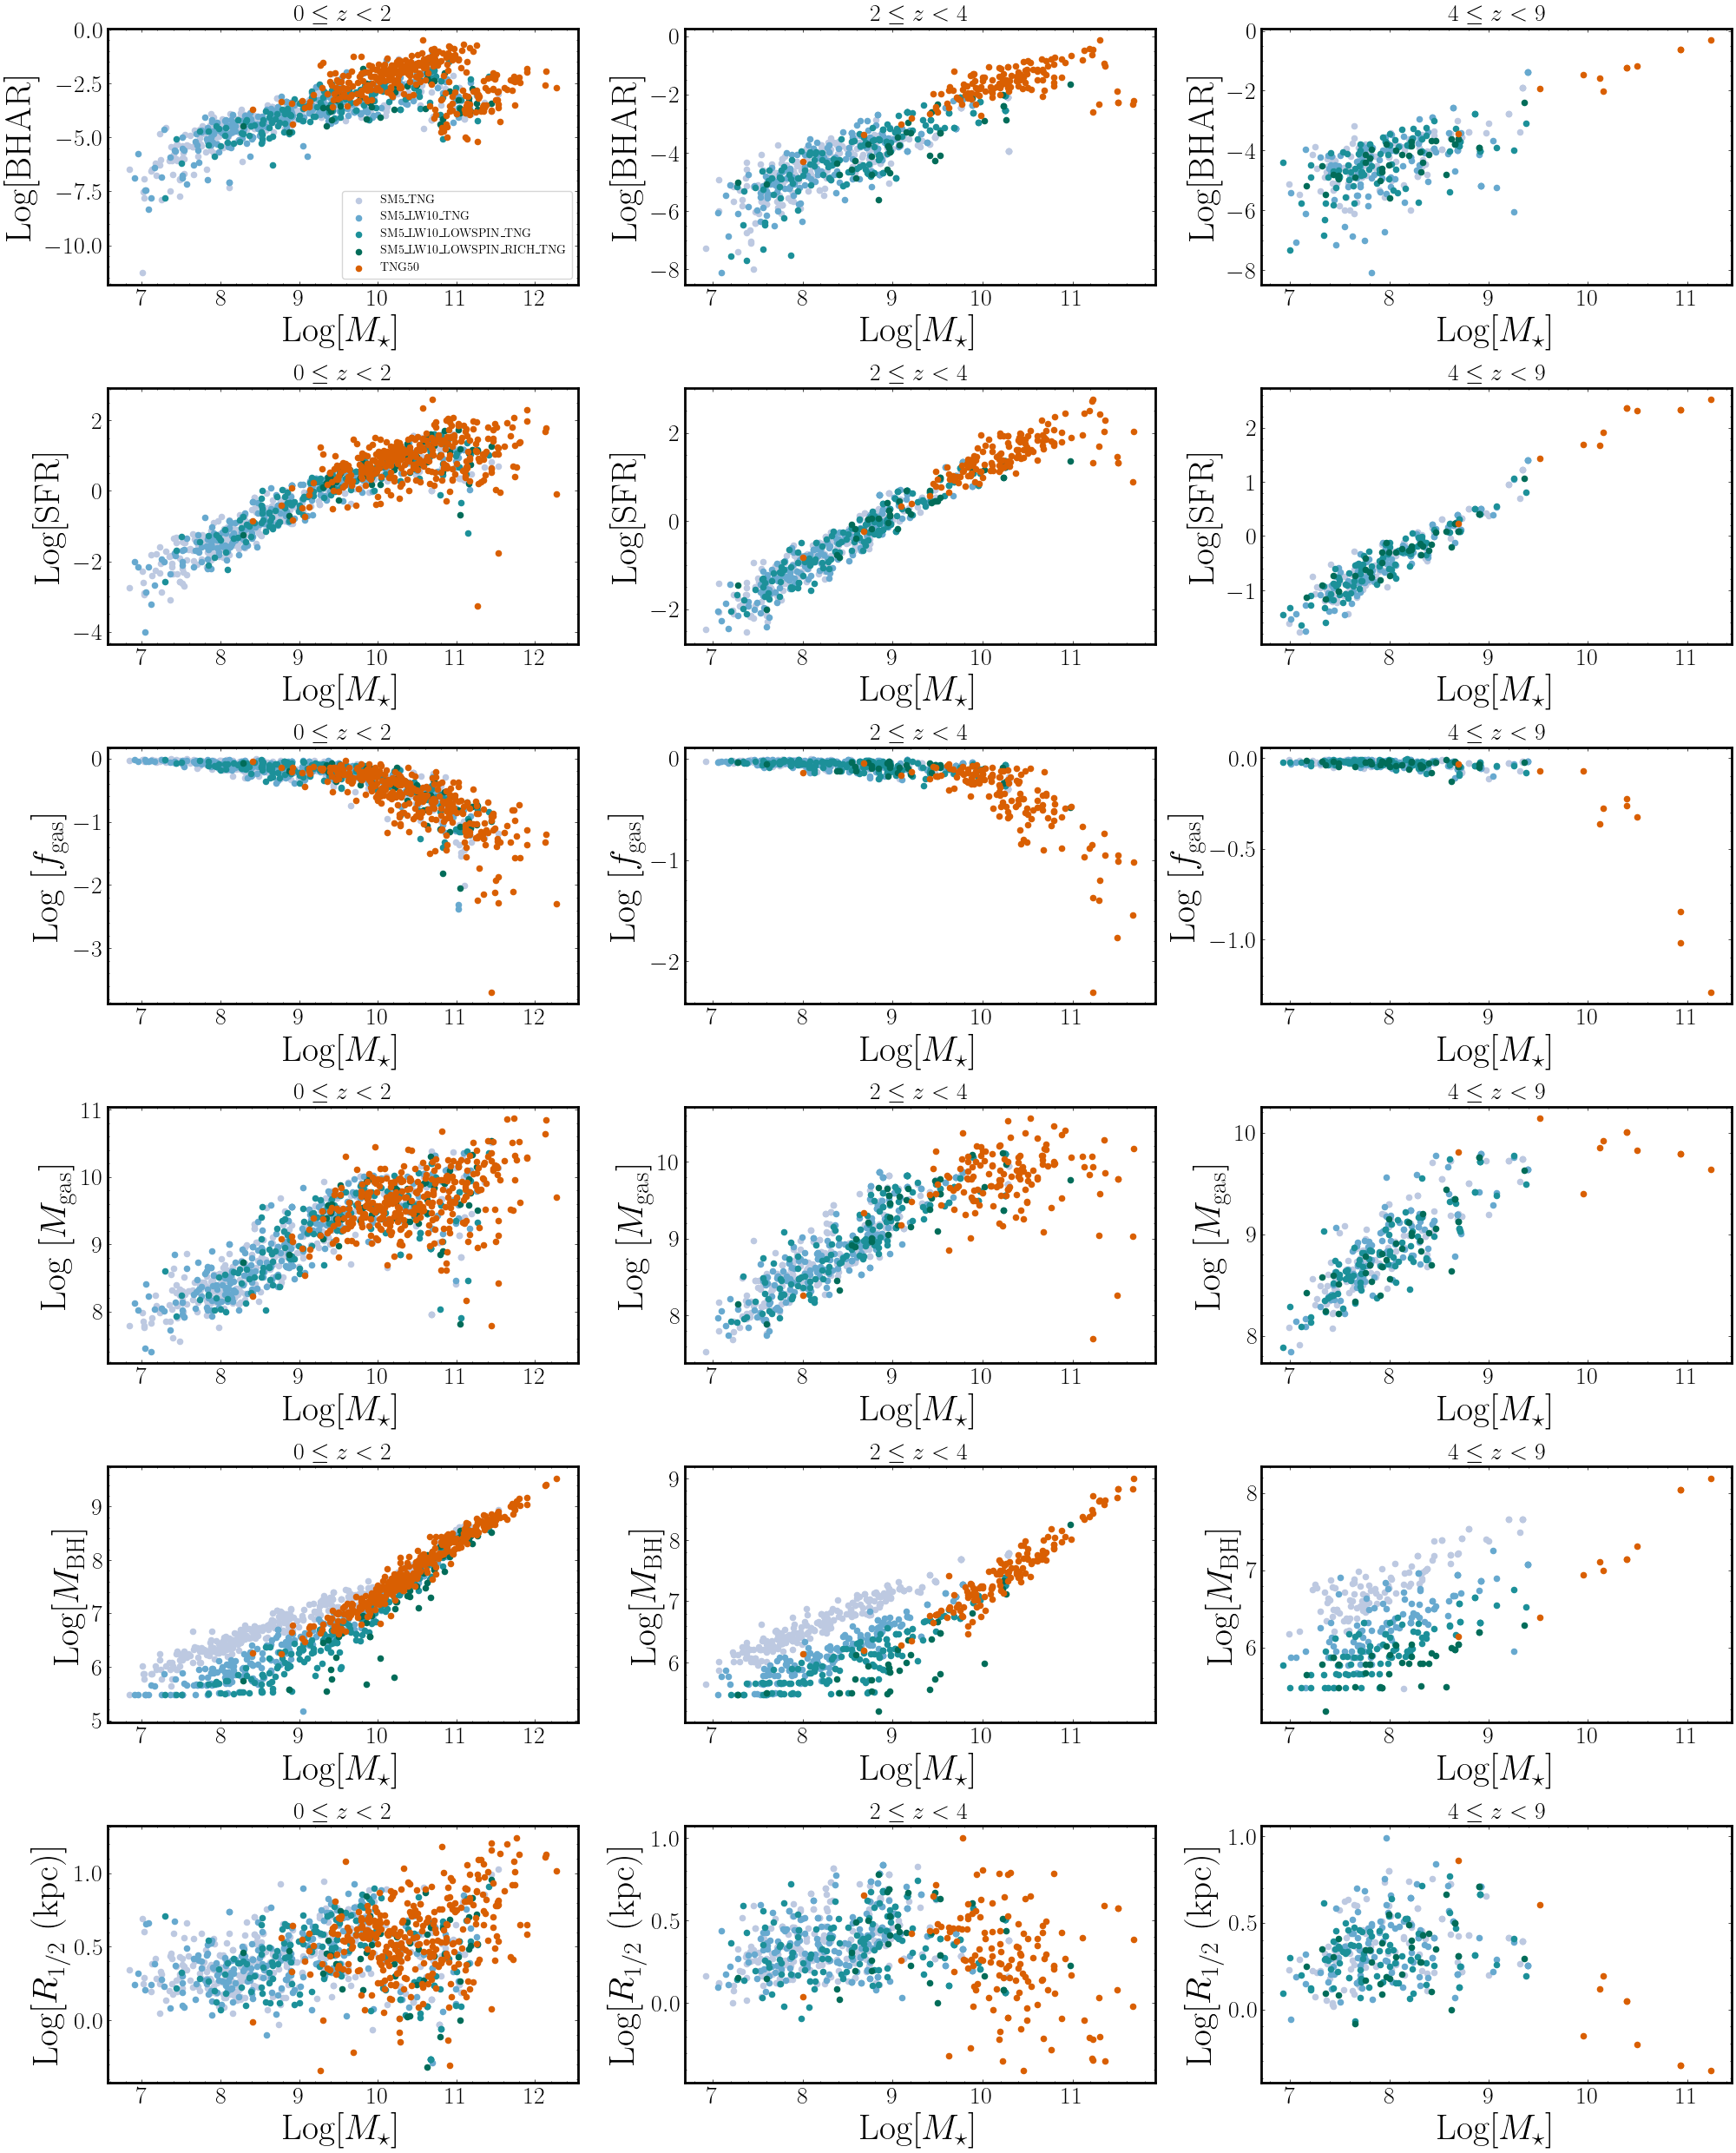

In [13]:
fig,axes = plt.subplots(6,3,figsize=(20,25))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=10)

quantities_list = ['Mdot_merging_pop','SFR_merging_pop','fgas_progs','MgasInRad','MBH_merging_pop','StellarHalfmassRad_merging_pop']
quantities_labels = ['Log[BHAR]','Log[SFR]',r'Log [$f_{\rm gas}$]',r'Log [$M_{\rm gas}$]',r'Log[$M_{\rm BH}$]',r'Log[$R_{1/2}$ (kpc)]']
# quantities_list = ['sBHAR_merging_pop','Mdot_merging_pop','MBH_merging_pop','MgasInRad','fgas_progs','SFR_merging_pop','sSFR_merging_pop','Mstar_merging_pop']
# quantities_labels = ['Log[sBHAR]','Log[BHAR]',r'Log[$M_{\rm BH}$]',r'Log [$M_{\rm gas}$]',r'Log [$f_{\rm gas}$]','Log[SFR]','Log[sSFR]','Log[$M_{\star}$]']  

z_lower =0
z_upper =2

for i,quantities in enumerate(quantities_list):
    for j,sims in enumerate(sim_names):
        ax = plot_property_vs_Mstar_for_z_interval(axes[i,0],sim_objs[sims],sims,sim_colors[j],z_lower,z_upper,quantity_name=quantities,plot_log10=True)
        ax.set_ylabel(quantities_labels[i])
        ax.set_xlabel(r'Log[$M_{\star}$]')
        ax.set_title(r"$0 \leq z < 2$")
    if i==0:
        ax.legend(frameon=True)

z_lower = 2
z_upper = 4

for i,quantities in enumerate(quantities_list):
    for j,sims in enumerate(sim_names):
        ax = plot_property_vs_Mstar_for_z_interval(axes[i,1],sim_objs[sims],sims,sim_colors[j],z_lower,z_upper,quantity_name=quantities,plot_log10=True)
        ax.set_ylabel(quantities_labels[i])
        ax.set_xlabel(r'Log[$M_{\star}$]')
        ax.set_title(r"$2 \leq z < 4$")

z_lower = 4
z_upper = 9

for i,quantities in enumerate(quantities_list):
    for j,sims in enumerate(sim_names):
        ax = plot_property_vs_Mstar_for_z_interval(axes[i,2],sim_objs[sims],sims,sim_colors[j],z_lower,z_upper,quantity_name=quantities,plot_log10=True)
        ax.set_ylabel(quantities_labels[i])
        ax.set_xlabel(r'Log[$M_{\star}$]')
        ax.set_title(r"$4 \leq z < 9$")

fig.tight_layout()

## All Subhalo Information

In [14]:
tng_subhalo_file = "/home/pranavsatheesh/host_galaxies/data/TNG-50_subhalo_statistics.hdf5"
tng_50_all_subhalos = h5py.File(tng_subhalo_file,'r')

print(tng_50_all_subhalos.keys())

<KeysViewHDF5 ['MBH', 'MdotBH', 'MgasinRad', 'Mgastotal', 'Mstar', 'MstarinRad', 'SFR', 'StellarHalfmassRadType', 'snap', 'z']>


In [15]:
simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG','TNG50']
all_subhalos_objs = {}

for sim in simName_array:
    subhalo_file = "/home/pranavsatheesh/host_galaxies/data/" + sim + "_subhalo_statistics.hdf5"
    all_subhalos_objs[sim] = h5py.File(subhalo_file,'r')

In [18]:
all_subhalos_objs['TNG50']['StellarHalfmassRadType'][0]

31.197882698178468

In [19]:
def plot_property_vs_Mstar_for_z_interval_for_all_subhalos(ax,sim_obj,sim_name,sim_color,z_lower,z_upper,quantity_name
                                          ,plot_log10=True,alpha=0.1,size=5,marker='o',hist_bins=20):
    #select mergers in the z interval
    #h=0.6774
    z_mask = (sim_obj['z'][:]>= z_lower) & (sim_obj['z'][:]< z_upper)
    Mstar_values = np.log10(sim_obj['Mstar'][z_mask])

    if quantity_name == "StellarHalfmassRadType":
        #convert ckpc to kpc by multipyling scale factor
        scale_factors = 1/(1+sim_obj['z'][z_mask])
        stellar_halfmass_rad_kpc = sim_obj['StellarHalfmassRadType'][z_mask]*scale_factors
        quantity_values = stellar_halfmass_rad_kpc
    elif quantity_name == "SFR":
        quantity_values = sim_obj['SFR'][z_mask]
    else:
        quantity_values = sim_obj[quantity_name][z_mask]
    if plot_log10:
        quantity_values = np.log10(quantity_values)
    #scatter plot

    x = Mstar_values
    y = quantity_values
    valid = np.isfinite(x) & np.isfinite(y)
    x = x[valid]
    y = y[valid]
    H,xedges,yedges = np.histogram2d(x,y,bins=hist_bins,range=[[np.min(x), np.max(x)], [np.min(y), np.max(y)]])

    xcent = 0.5*(xedges[1:] + xedges[:-1])
    ycent = 0.5*(yedges[1:] + yedges[:-1])
    X,Y = np.meshgrid(xcent,ycent)
    flat = H.ravel()
    flat_nonzero = flat[flat > 0]
    perc = np.percentile(flat_nonzero,[50,68,90])

    ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=alpha)
    #ax.scatter(Mstar_values,quantity_values,color=sim_color,alpha=alpha,label="All subhalos",s=10,marker=marker)
    ax.set_xlabel(r'$M_{\star}$ [M$_{\odot}$]')
    return ax

In [20]:
def plot_color_magnitude_diagram(ax,sim_obj,plot_name,sim_color,sim_alpha=1,sim_size=10,sim_marker='o'
                                 ,all_subhalos=True,scatter=True,contours=True,hist_bins=20
                                 ,z_lower=0,z_upper=2):


    if all_subhalos:
        z_mask = (sim_obj['z'][:]>= z_lower) & (sim_obj['z'][:]< z_upper)
        Mg = sim_obj['SubhaloPhotoMag'][z_mask,4] #g-band magnitude
        Mr = sim_obj['SubhaloPhotoMag'][z_mask,5] #r-band magnitude

        
    else:
        #considering only major major mergers (>0.25 mass ratio)
        z_mergers = sim_obj.z_merging_pop
        z_mask = (z_mergers >= z_lower) & (z_mergers < z_upper)
        major_major_merger_mask = sim_obj.major_major_merger_mask
        z_mask = z_mask & major_major_merger_mask
        Mg = sim_obj.SubhaloPhotoMag_merging_pop[z_mask,4]
        Mr = sim_obj.SubhaloPhotoMag_merging_pop[z_mask,5]
    
    if scatter:
        ax.scatter(Mg-Mr,Mr,color=sim_color,alpha=sim_alpha,label=plot_name,s=sim_size,marker=sim_marker)

    if contours:
        x = Mg - Mr
        y = Mr
        valid = np.isfinite(x) & np.isfinite(y)
        x = x[valid]
        y = y[valid]
        H,xedges,yedges = np.histogram2d(x,y,bins=hist_bins,range=[[np.min(x), np.max(x)], [np.min(y), np.max(y)]])    
        xcent = 0.5*(xedges[1:] + xedges[:-1])
        ycent = 0.5*(yedges[1:] + yedges[:-1])
        X,Y = np.meshgrid(xcent,ycent)
        flat = H.ravel()
        flat_nonzero = flat[flat > 0]
        perc = np.percentile(flat_nonzero,[50,68,90])   
        ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=sim_alpha,label=plot_name)
        

    return ax

/tmp/ipykernel_151708/101354790.py:18: RuntimeWarning: divide by zero encountered in log10
  quantity_values = np.log10(quantity_values)
/tmp/ipykernel_151708/1995326583.py:28: RuntimeWarning: divide by zero encountered in log10
  quantity_values = np.log10(quantity_values)
/tmp/ipykernel_151708/1948363361.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=sim_alpha,label=plot_name)


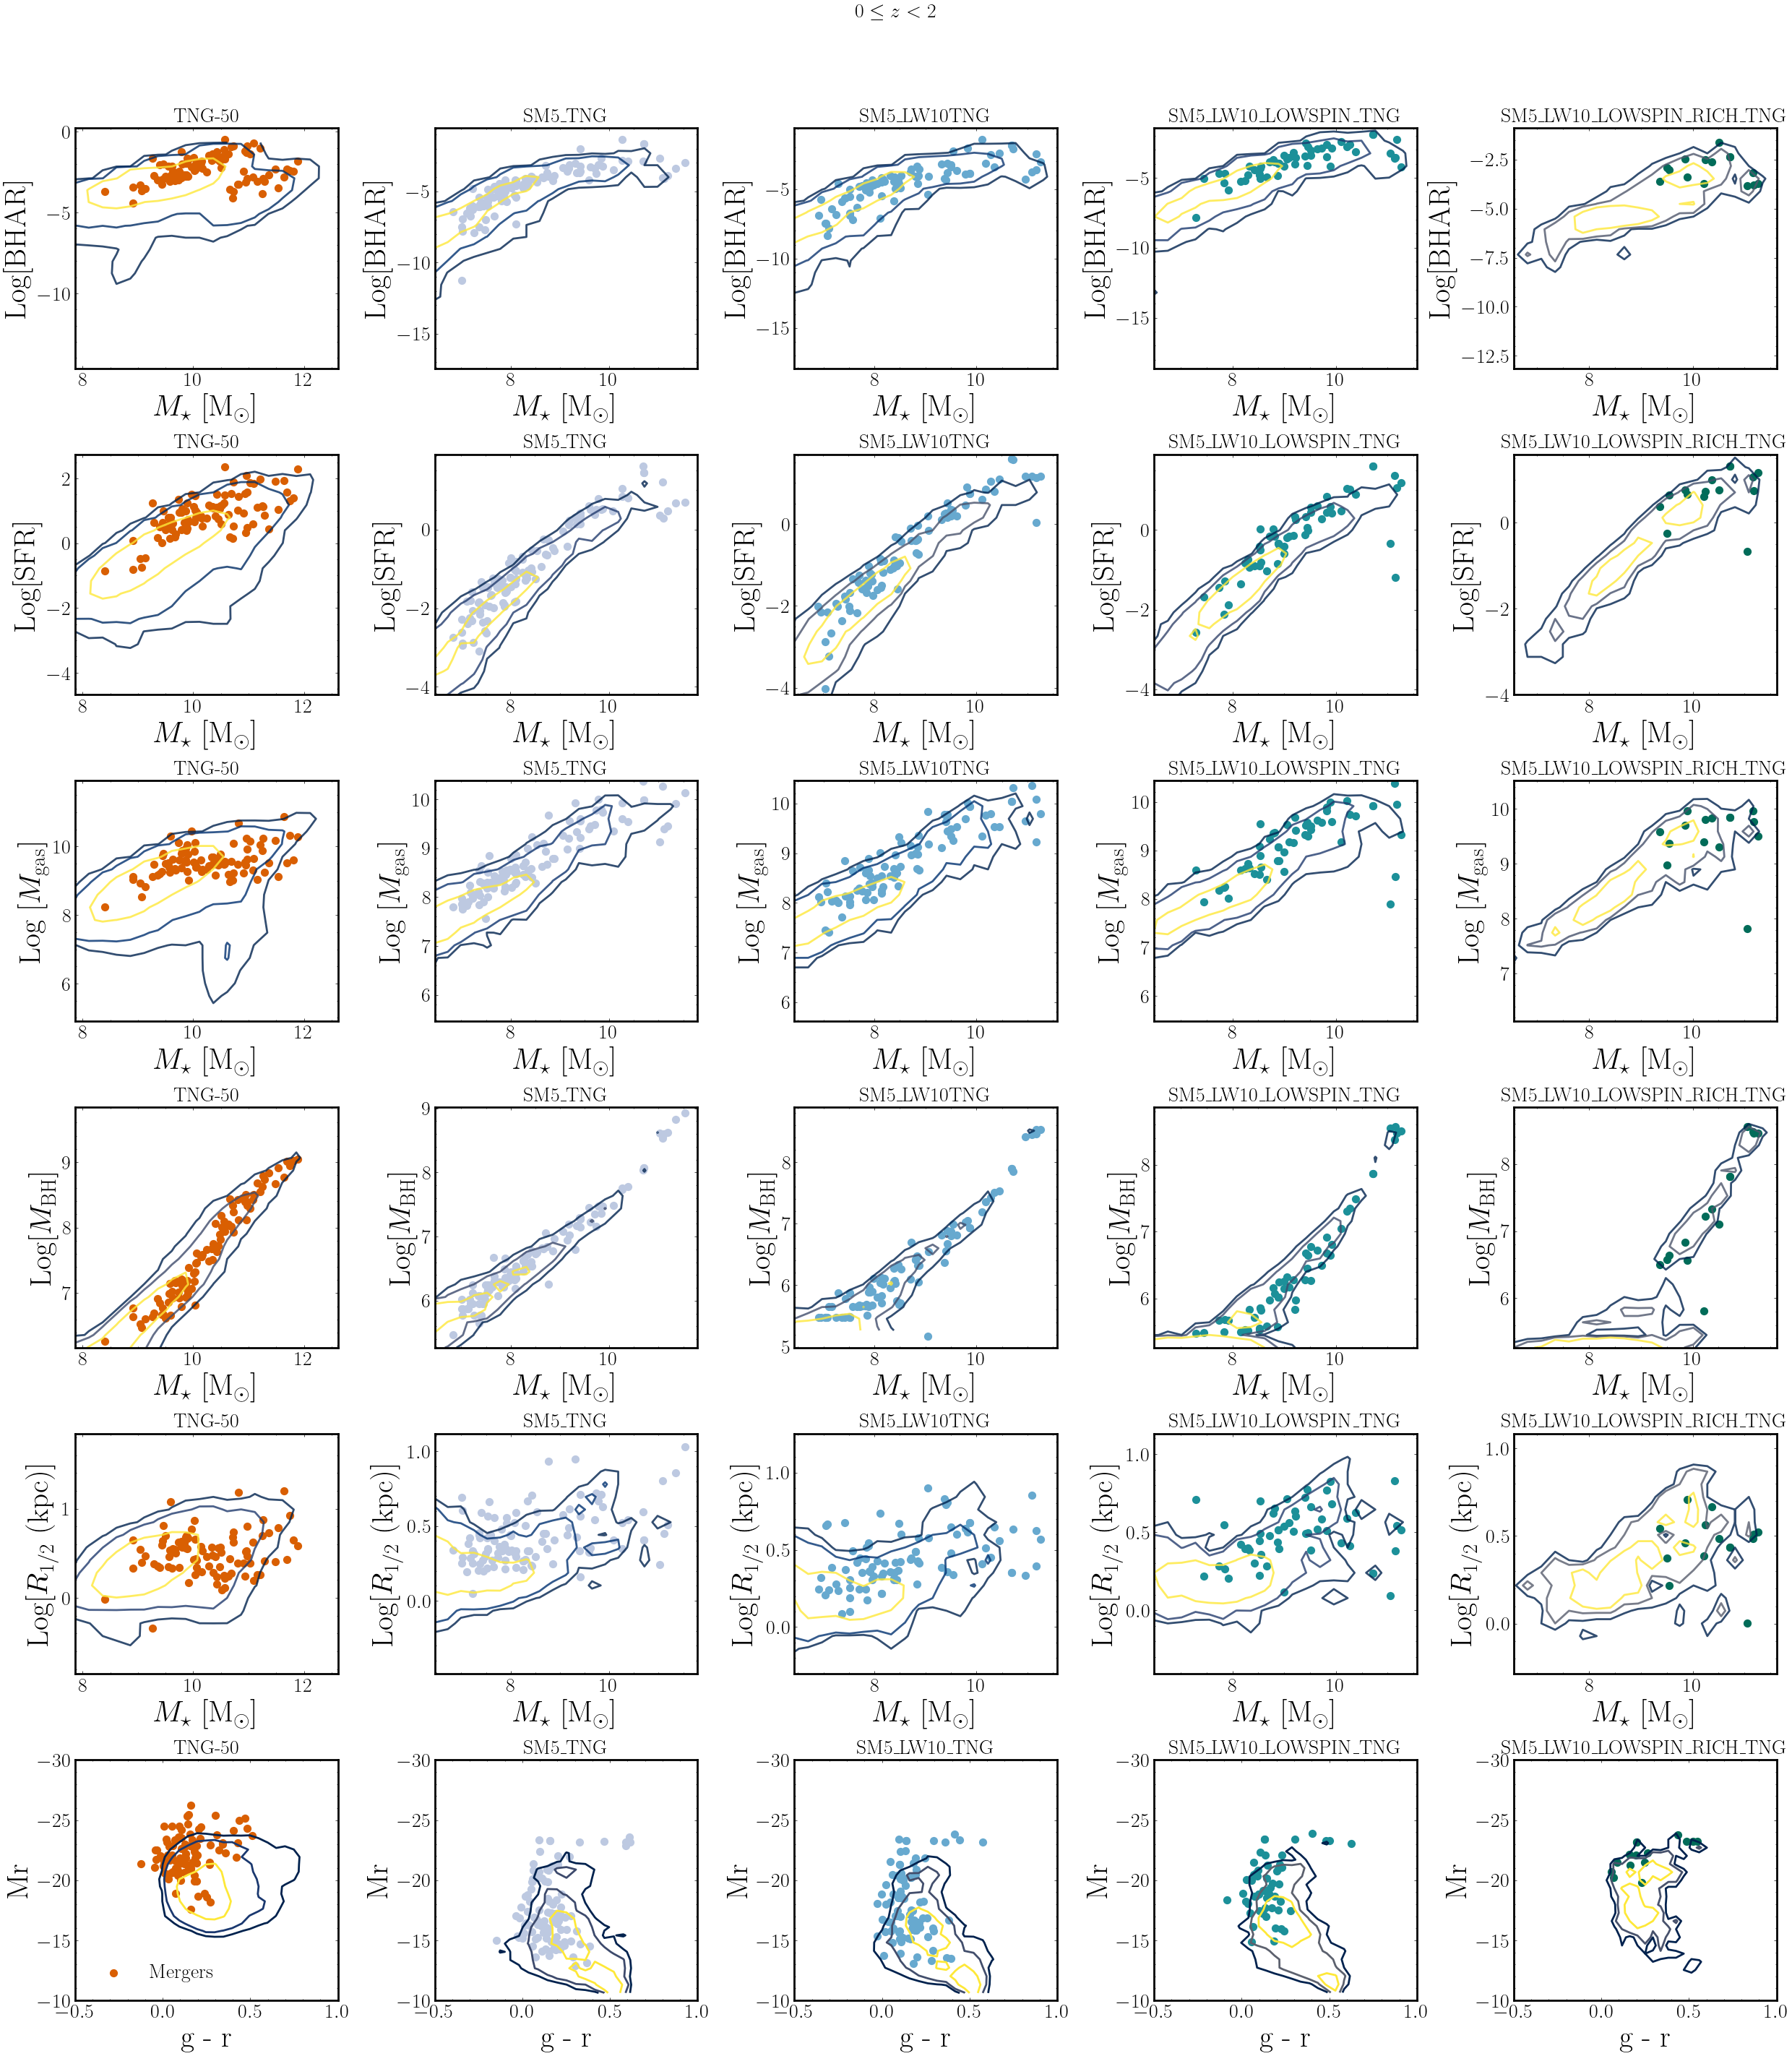

In [21]:
fig,axes = plt.subplots(6,5,figsize=(25,30))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=20)

quantities_list = ['MdotBH','SFR','MgasinRad','MBH','StellarHalfmassRadType']
quantities_list_mergers = ['Mdot_merging_pop','SFR_merging_pop','MgasInRad','MBH_merging_pop','StellarHalfmassRad_merging_pop']
quantities_labels = ['Log[BHAR]','Log[SFR]',r'Log [$M_{\rm gas}$]',r'Log[$M_{\rm BH}$]',r'Log[$R_{1/2}$ (kpc)]']
# quantities_list = ['sBHAR_merging_pop','Mdot_merging_pop','MBH_merging_pop','MgasInRad','fgas_progs','SFR_merging_pop','sSFR_merging_pop','Mstar_merging_pop']
# quantities_labels = ['Log[sBHAR]','Log[BHAR]',r'Log[$M_{\rm BH}$]',r'Log [$M_{\rm gas}$]',r'Log [$f_{\rm gas}$]','Log[SFR]','Log[sSFR]','Log[$M_{\star}$]']  

z_lower =0
z_upper =2

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,0],all_subhalos_objs['TNG50'], 'TNG50','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,0],sim_objs['TNG50'],'TNG50',TNG_color,z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50,alpha=1)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('TNG-50')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,1],all_subhalos_objs['SM5_TNG'], 'SM5_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,1],sim_objs['SM5_TNG'],'SM5_TNG',sim_colors[0],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50,alpha=1)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,2],all_subhalos_objs['SM5_LW10_TNG'], 'SM5_LW10_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,2],sim_objs['SM5_LW10_TNG'],'SM5_LW10_TNG',sim_colors[1],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                       ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50,alpha=1)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,3],all_subhalos_objs['SM5_LW10_LOWSPIN_TNG'], 'SM5_LW10_LOWSPIN_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,3],sim_objs['SM5_LW10_LOWSPIN_TNG'],'SM5_LW10_LOWSPIN_TNG',sim_colors[2],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50,alpha=1)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_TNG')
#ax2.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,4],all_subhalos_objs['SM5_LW10_LOWSPIN_RICH_TNG'], 'SM5_LW10_LOWSPIN_RICH_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,4],sim_objs['SM5_LW10_LOWSPIN_RICH_TNG'],'SM5_LW10_LOWSPIN_RICH_TNG',sim_colors[3],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50,alpha=1)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_RICH_TNG')

ax = plot_color_magnitude_diagram(axes[5,0],all_subhalos_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
ax = plot_color_magnitude_diagram(axes[5,0],sim_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
ax.set_title('TNG-50')
ax.set_xlabel('g - r')
ax.set_ylabel('Mr')
ax.set_ylim(-30, -10)
ax.invert_yaxis()
ax.legend(loc="lower left")
ax.set_xlim(-0.5,1)


for i,sim in enumerate(sim_names[:-1]):
    ax = plot_color_magnitude_diagram(axes[5,i+1],all_subhalos_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
    ax = plot_color_magnitude_diagram(axes[5,i+1],sim_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
    ax.set_title(sim)
    ax.set_xlabel('g - r')
    ax.set_ylabel('Mr')
    ax.set_ylim(-30, -10)
    ax.invert_yaxis()
    #ax.legend()
    ax.set_xlim(-0.5,1)
    

fig.suptitle(r"$0 \leq z < 2$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
fig.savefig('../figures/TNG50_and_brahma_mergers_vs_allsubhalos_z0-2.pdf')

/tmp/ipykernel_151708/101354790.py:18: RuntimeWarning: divide by zero encountered in log10
  quantity_values = np.log10(quantity_values)
/tmp/ipykernel_151708/1948363361.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=sim_alpha,label=plot_name)


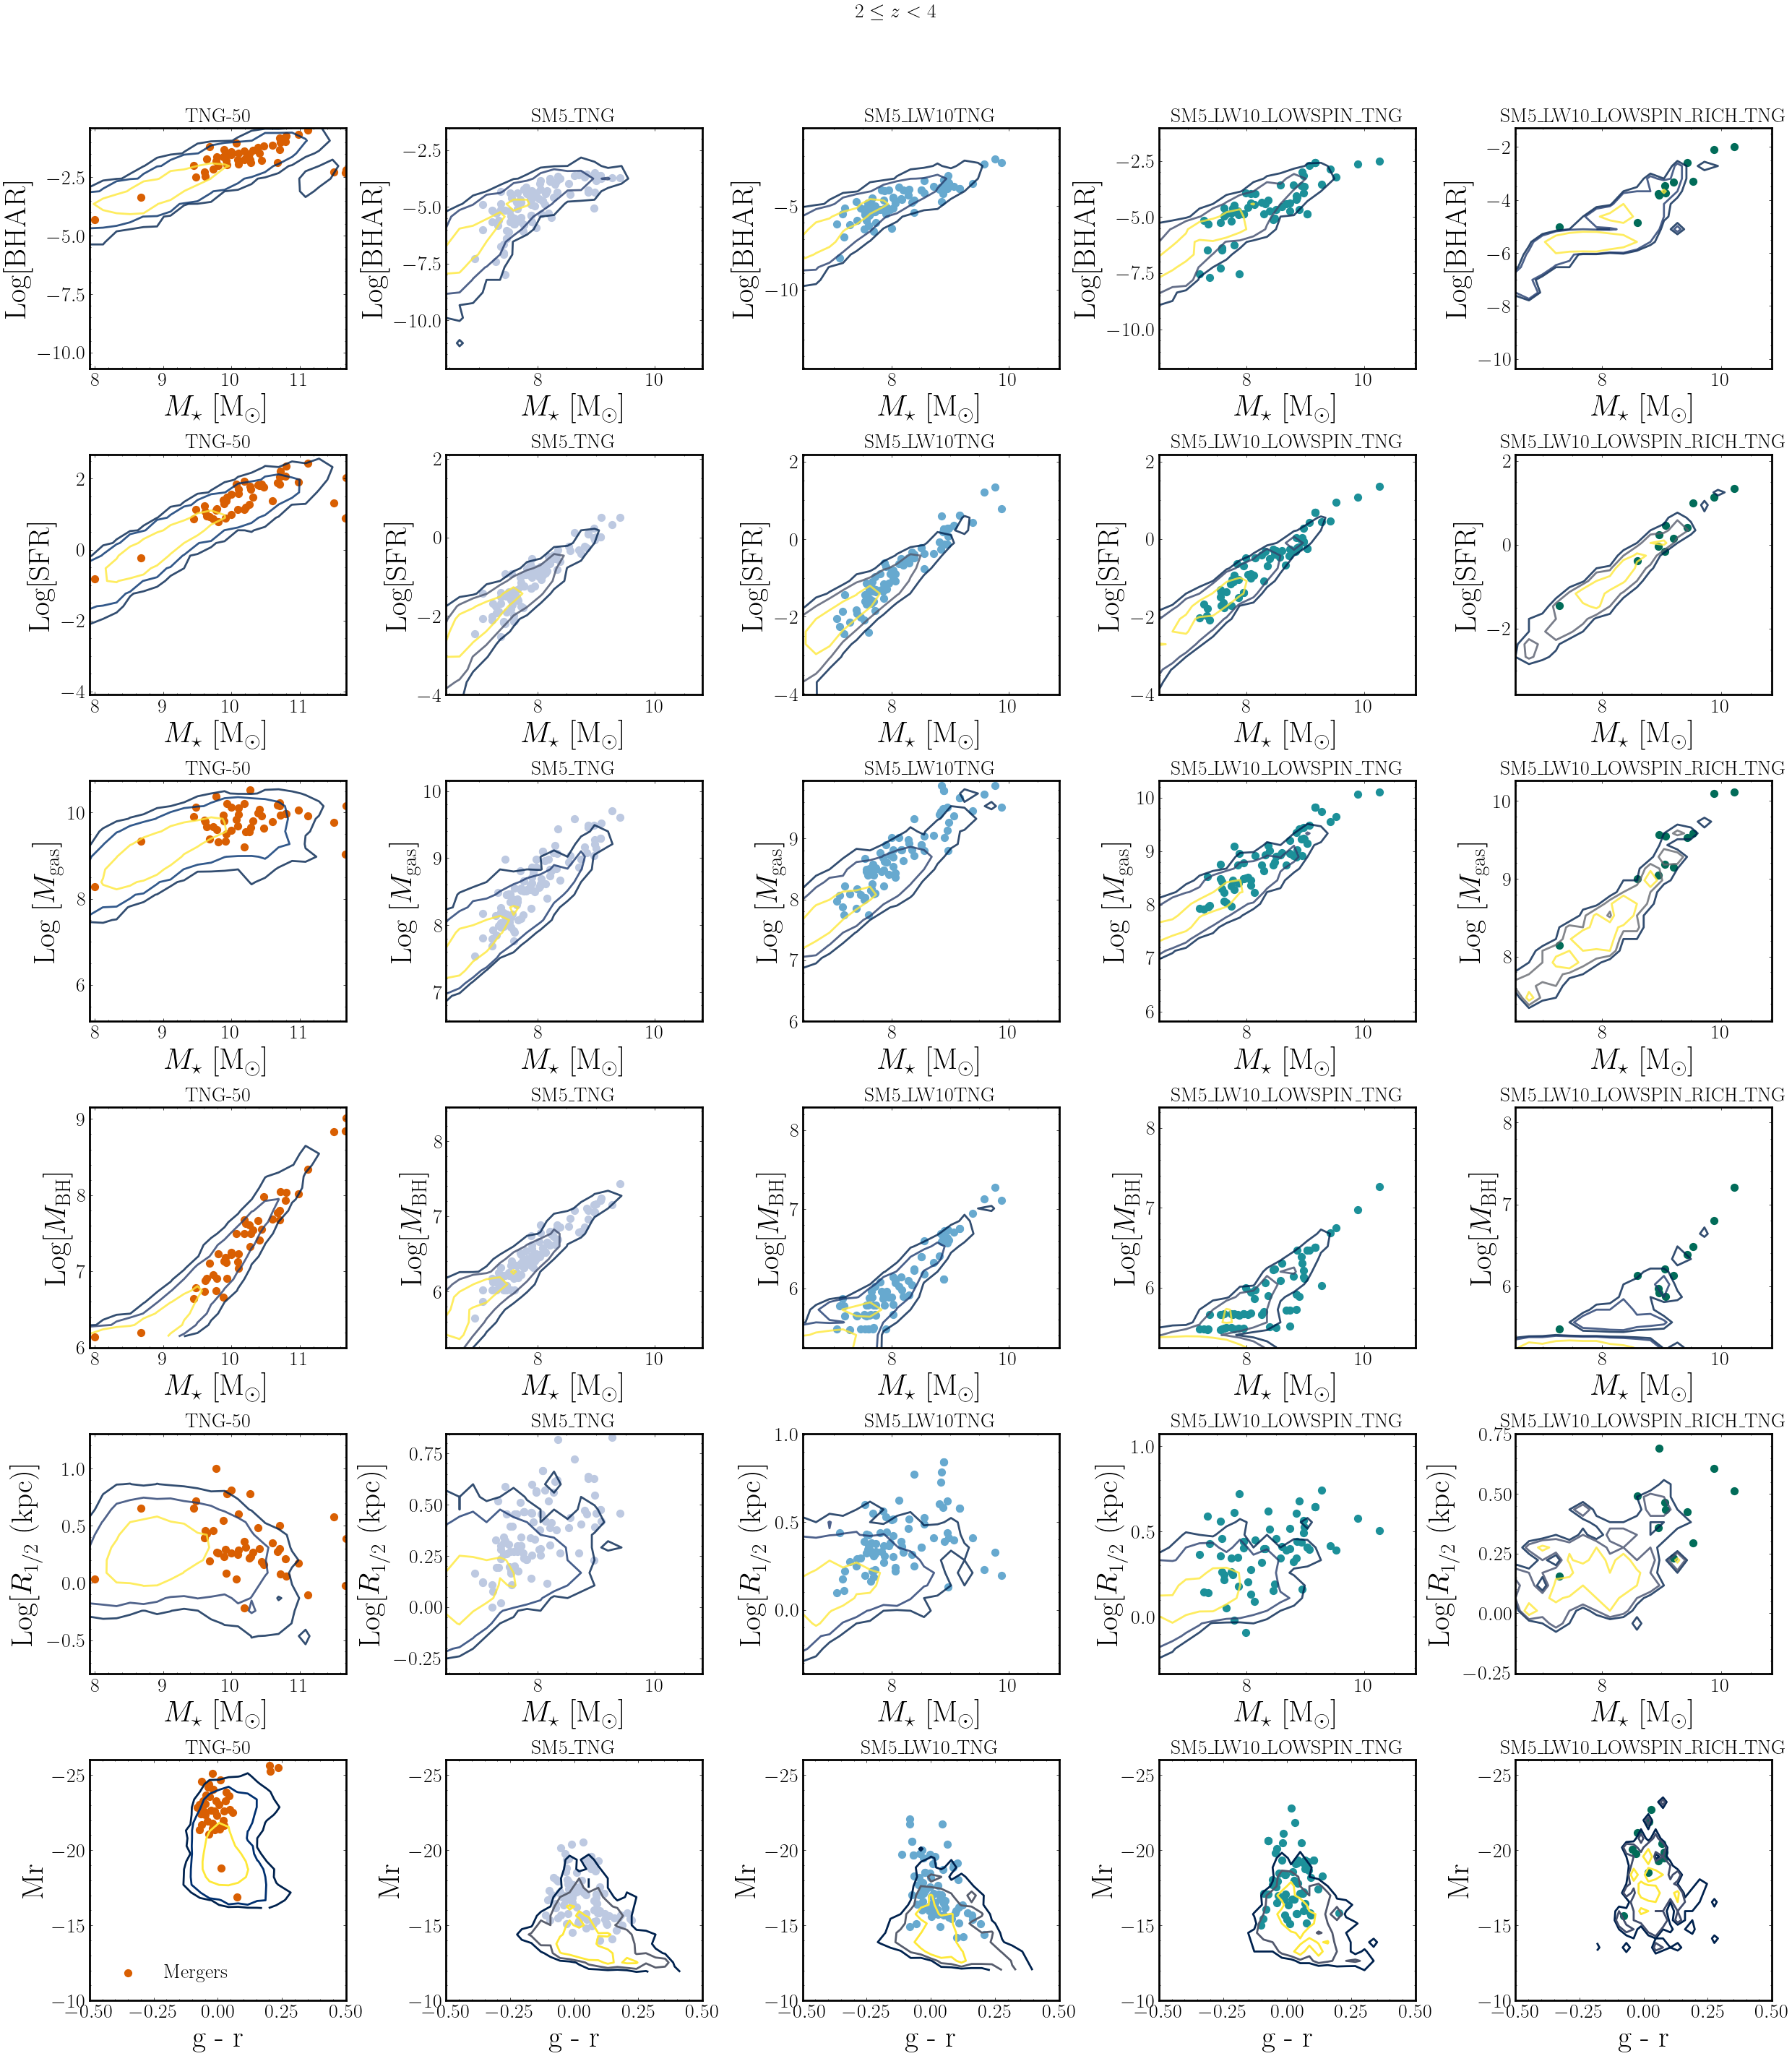

In [22]:
fig,axes = plt.subplots(6,5,figsize=(25,30))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=20)

quantities_list = ['MdotBH','SFR','MgasinRad','MBH','StellarHalfmassRadType']
quantities_list_mergers = ['Mdot_merging_pop','SFR_merging_pop','MgasInRad','MBH_merging_pop','StellarHalfmassRad_merging_pop']
quantities_labels = ['Log[BHAR]','Log[SFR]',r'Log [$M_{\rm gas}$]',r'Log[$M_{\rm BH}$]',r'Log[$R_{1/2}$ (kpc)]']
# quantities_list = ['sBHAR_merging_pop','Mdot_merging_pop','MBH_merging_pop','MgasInRad','fgas_progs','SFR_merging_pop','sSFR_merging_pop','Mstar_merging_pop']
# quantities_labels = ['Log[sBHAR]','Log[BHAR]',r'Log[$M_{\rm BH}$]',r'Log [$M_{\rm gas}$]',r'Log [$f_{\rm gas}$]','Log[SFR]','Log[sSFR]','Log[$M_{\star}$]']  

z_lower =2
z_upper =4

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,0],all_subhalos_objs['TNG50'], 'TNG-50','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,0],sim_objs['TNG50'],'TNG50',TNG_color,z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('TNG-50')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,1],all_subhalos_objs['SM5_TNG'], 'SM5_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,1],sim_objs['SM5_TNG'],'SM5_TNG',sim_colors[0],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,2],all_subhalos_objs['SM5_LW10_TNG'], 'SM5_LW10_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,2],sim_objs['SM5_LW10_TNG'],'SM5_LW10_TNG',sim_colors[1],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                       ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)    
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,3],all_subhalos_objs['SM5_LW10_LOWSPIN_TNG'], 'SM5_LW10_LOWSPIN_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,3],sim_objs['SM5_LW10_LOWSPIN_TNG'],'SM5_LW10_LOWSPIN_TNG',sim_colors[2],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,4],all_subhalos_objs['SM5_LW10_LOWSPIN_RICH_TNG'], 'SM5_LW10_LOWSPIN_RICH_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,4],sim_objs['SM5_LW10_LOWSPIN_RICH_TNG'],'SM5_LW10_LOWSPIN_RICH_TNG',sim_colors[3],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_RICH_TNG')
#ax1.legend(loc="lower left")

ax = plot_color_magnitude_diagram(axes[5,0],all_subhalos_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
ax = plot_color_magnitude_diagram(axes[5,0],sim_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
ax.set_title('TNG-50')
ax.set_xlabel('g - r')
ax.set_ylabel('Mr')
ax.set_ylim(-26, -10)
ax.invert_yaxis()
ax.legend()
ax.set_xlim(-0.5,0.5)


for i,sim in enumerate(sim_names[:-1]):
    ax = plot_color_magnitude_diagram(axes[5,i+1],all_subhalos_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
    ax = plot_color_magnitude_diagram(axes[5,i+1],sim_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
    ax.set_title(sim)
    ax.set_xlabel('g - r')
    ax.set_ylabel('Mr')
    ax.set_ylim(-26, -10)
    ax.invert_yaxis()
    #ax.legend()
    ax.set_xlim(-0.5,0.5)
    
    
fig.suptitle(r"$2 \leq z < 4$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

/tmp/ipykernel_3147093/3211133278.py:18: RuntimeWarning: divide by zero encountered in log10
  quantity_values = np.log10(quantity_values)
/tmp/ipykernel_3147093/1948363361.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=sim_alpha,label=plot_name)


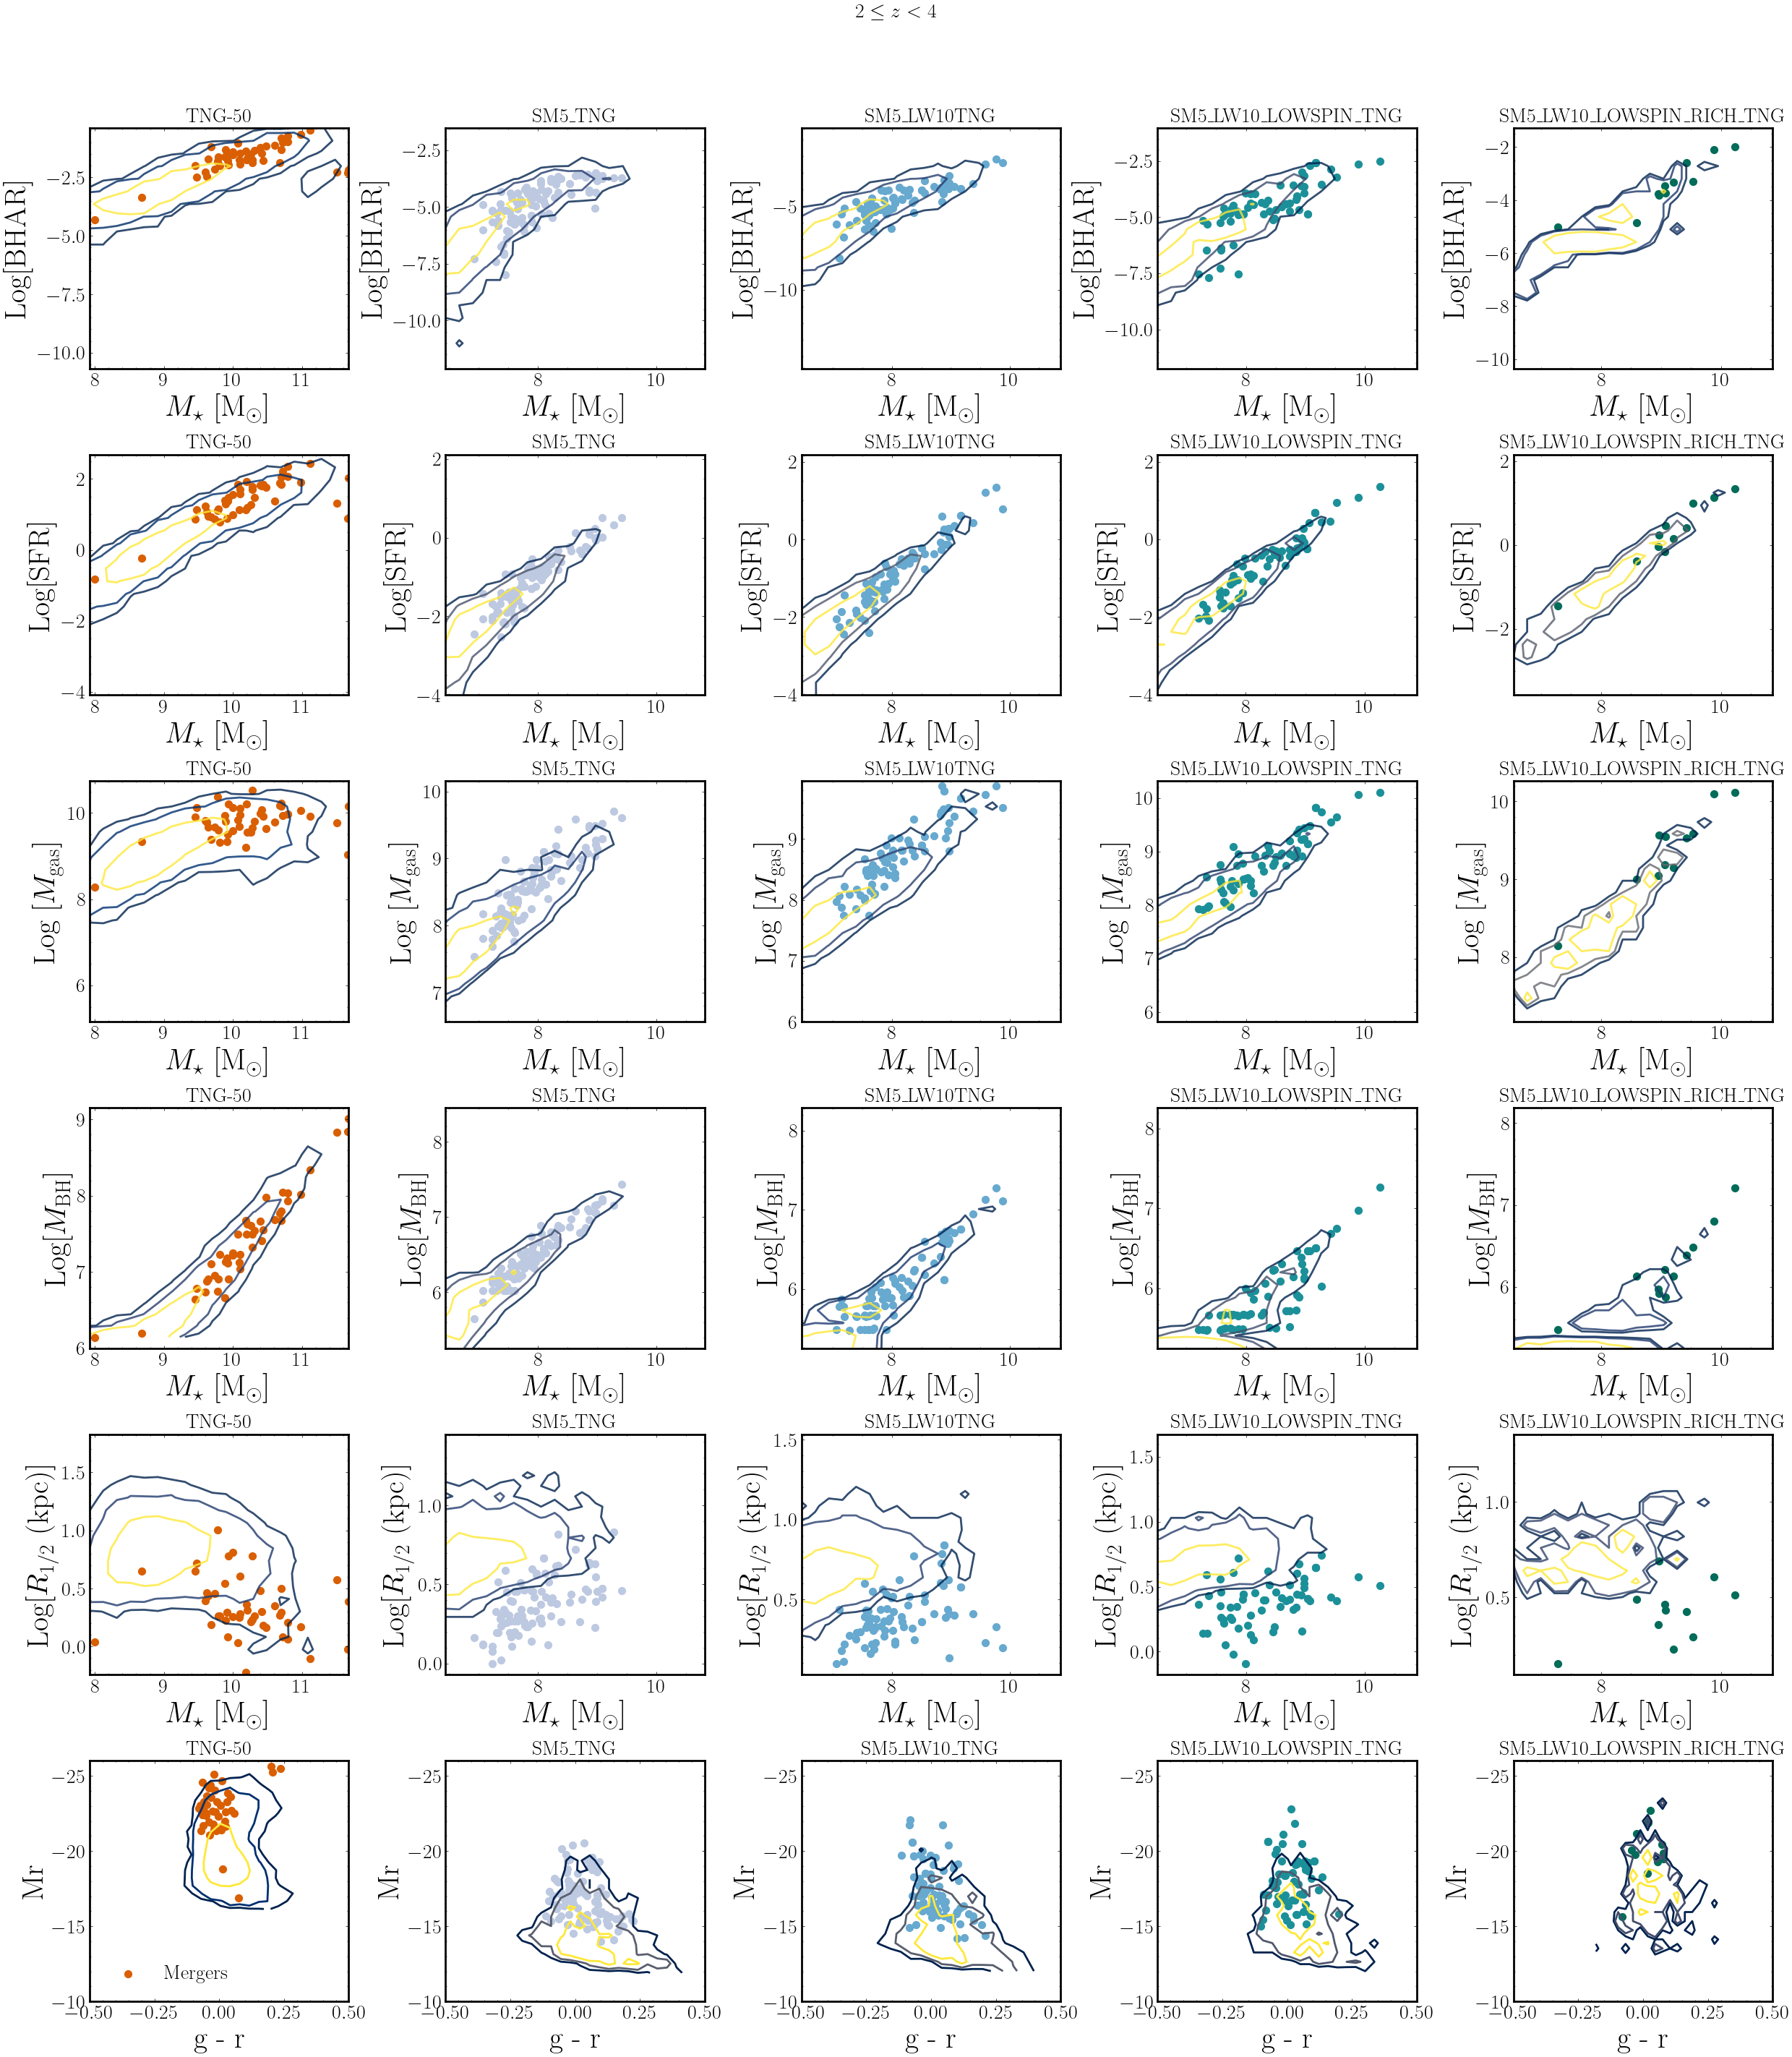

In [151]:
fig,axes = plt.subplots(6,5,figsize=(25,30))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=20)

quantities_list = ['MdotBH','SFR','MgasinRad','MBH','StellarHalfmassRadType']
quantities_list_mergers = ['Mdot_merging_pop','SFR_merging_pop','MgasInRad','MBH_merging_pop','StellarHalfmassRad_merging_pop']
quantities_labels = ['Log[BHAR]','Log[SFR]',r'Log [$M_{\rm gas}$]',r'Log[$M_{\rm BH}$]',r'Log[$R_{1/2}$ (kpc)]']
# quantities_list = ['sBHAR_merging_pop','Mdot_merging_pop','MBH_merging_pop','MgasInRad','fgas_progs','SFR_merging_pop','sSFR_merging_pop','Mstar_merging_pop']
# quantities_labels = ['Log[sBHAR]','Log[BHAR]',r'Log[$M_{\rm BH}$]',r'Log [$M_{\rm gas}$]',r'Log [$f_{\rm gas}$]','Log[SFR]','Log[sSFR]','Log[$M_{\star}$]']  

z_lower =2
z_upper =4

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,0],all_subhalos_objs['TNG50'], 'TNG-50','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,0],sim_objs['TNG50'],'TNG50',TNG_color,z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('TNG-50')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,1],all_subhalos_objs['SM5_TNG'], 'SM5_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,1],sim_objs['SM5_TNG'],'SM5_TNG',sim_colors[0],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,2],all_subhalos_objs['SM5_LW10_TNG'], 'SM5_LW10_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,2],sim_objs['SM5_LW10_TNG'],'SM5_LW10_TNG',sim_colors[1],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                       ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)    
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,3],all_subhalos_objs['SM5_LW10_LOWSPIN_TNG'], 'SM5_LW10_LOWSPIN_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,3],sim_objs['SM5_LW10_LOWSPIN_TNG'],'SM5_LW10_LOWSPIN_TNG',sim_colors[2],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,4],all_subhalos_objs['SM5_LW10_LOWSPIN_RICH_TNG'], 'SM5_LW10_LOWSPIN_RICH_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,4],sim_objs['SM5_LW10_LOWSPIN_RICH_TNG'],'SM5_LW10_LOWSPIN_RICH_TNG',sim_colors[3],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_RICH_TNG')
#ax1.legend(loc="lower left")

ax = plot_color_magnitude_diagram(axes[5,0],all_subhalos_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
ax = plot_color_magnitude_diagram(axes[5,0],sim_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
ax.set_title('TNG-50')
ax.set_xlabel('g - r')
ax.set_ylabel('Mr')
ax.set_ylim(-26, -10)
ax.invert_yaxis()
ax.legend()
ax.set_xlim(-0.5,0.5)


for i,sim in enumerate(sim_names[:-1]):
    ax = plot_color_magnitude_diagram(axes[5,i+1],all_subhalos_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
    ax = plot_color_magnitude_diagram(axes[5,i+1],sim_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
    ax.set_title(sim)
    ax.set_xlabel('g - r')
    ax.set_ylabel('Mr')
    ax.set_ylim(-26, -10)
    ax.invert_yaxis()
    #ax.legend()
    ax.set_xlim(-0.5,0.5)
    
    
fig.suptitle(r"$2 \leq z < 4$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('../figures/TNG50_and_brahma_mergers_vs_allsubhalos_z2-4.pdf')

/tmp/ipykernel_151708/101354790.py:18: RuntimeWarning: divide by zero encountered in log10
  quantity_values = np.log10(quantity_values)
/tmp/ipykernel_151708/1948363361.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=sim_alpha,label=plot_name)


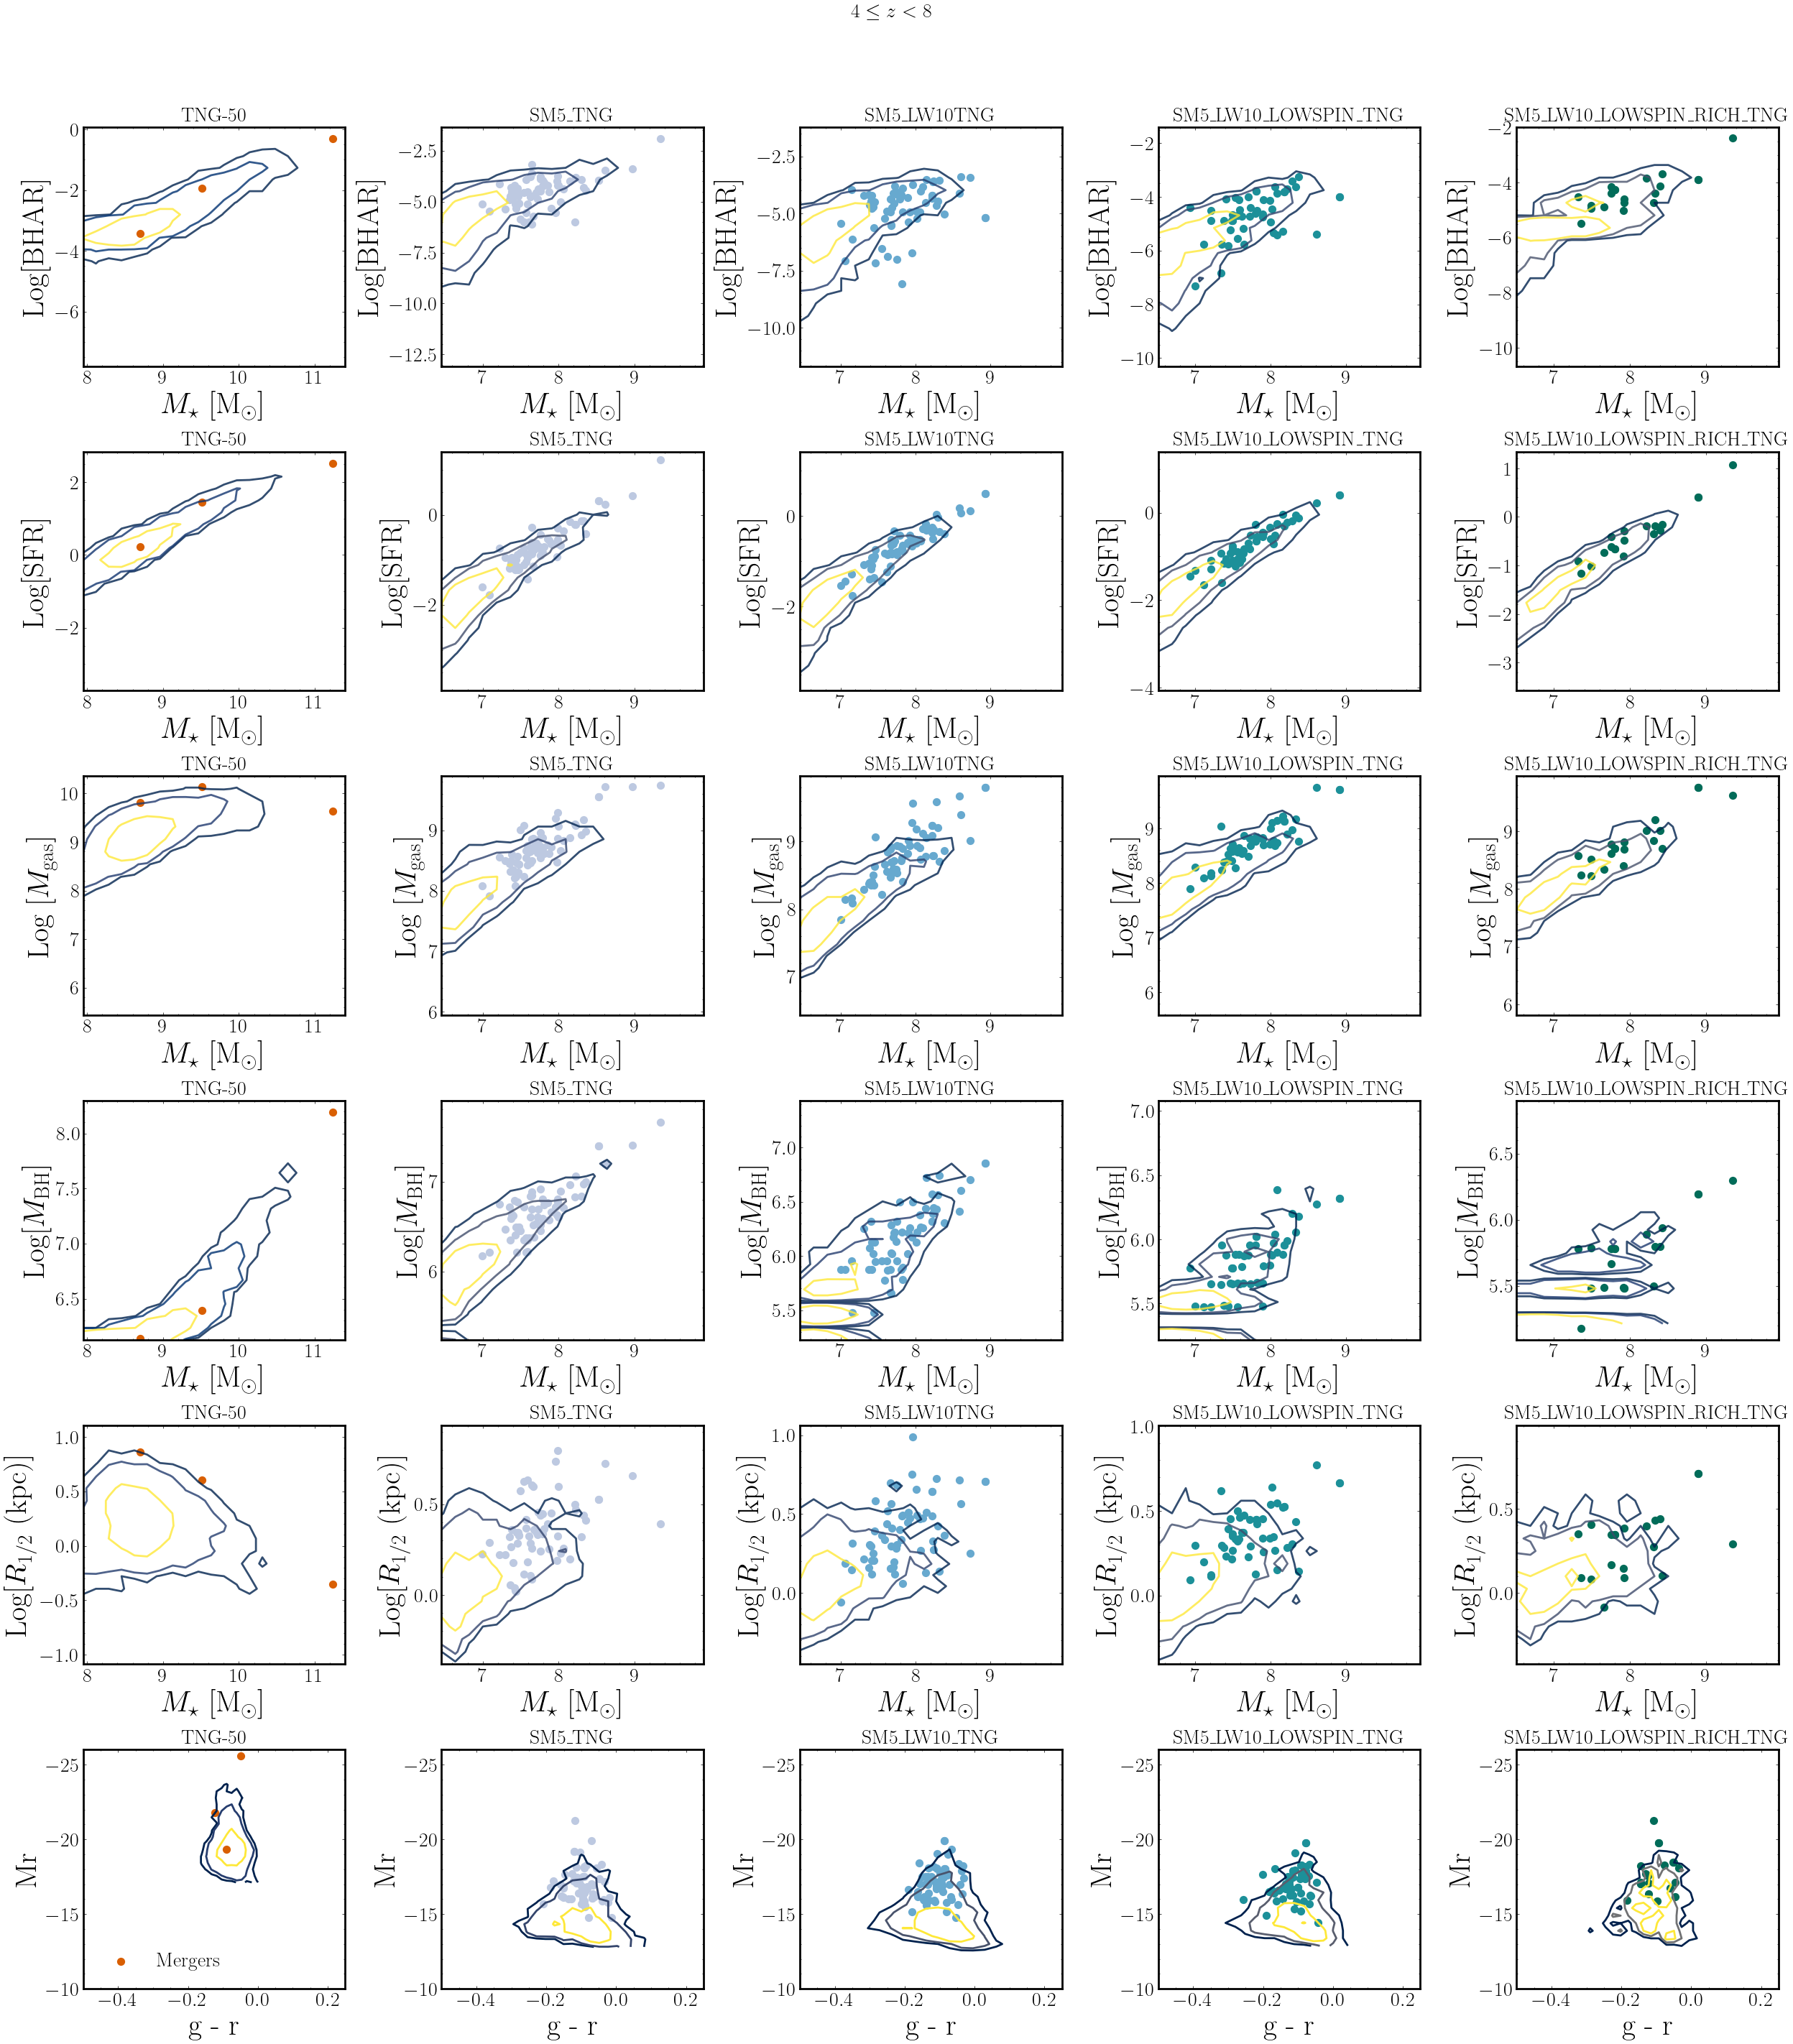

In [23]:
fig,axes = plt.subplots(6,5,figsize=(25,30))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=20)

quantities_list = ['MdotBH','SFR','MgasinRad','MBH','StellarHalfmassRadType']
quantities_list_mergers = ['Mdot_merging_pop','SFR_merging_pop','MgasInRad','MBH_merging_pop','StellarHalfmassRad_merging_pop']
quantities_labels = ['Log[BHAR]','Log[SFR]',r'Log [$M_{\rm gas}$]',r'Log[$M_{\rm BH}$]',r'Log[$R_{1/2}$ (kpc)]']
# quantities_list = ['sBHAR_merging_pop','Mdot_merging_pop','MBH_merging_pop','MgasInRad','fgas_progs','SFR_merging_pop','sSFR_merging_pop','Mstar_merging_pop']
# quantities_labels = ['Log[sBHAR]','Log[BHAR]',r'Log[$M_{\rm BH}$]',r'Log [$M_{\rm gas}$]',r'Log [$f_{\rm gas}$]','Log[SFR]','Log[sSFR]','Log[$M_{\star}$]']  

z_lower =4
z_upper =8

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,0],all_subhalos_objs['TNG50'], 'TNG-50','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,0],sim_objs['TNG50'],'TNG50',TNG_color,z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('TNG-50')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,1],all_subhalos_objs['SM5_TNG'], 'SM5_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,1],sim_objs['SM5_TNG'],'SM5_TNG',sim_colors[0],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,2],all_subhalos_objs['SM5_LW10_TNG'], 'SM5_LW10_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,2],sim_objs['SM5_LW10_TNG'],'SM5_LW10_TNG',sim_colors[1],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                       ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)    
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,3],all_subhalos_objs['SM5_LW10_LOWSPIN_TNG'], 'SM5_LW10_LOWSPIN_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,3],sim_objs['SM5_LW10_LOWSPIN_TNG'],'SM5_LW10_LOWSPIN_TNG',sim_colors[2],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,4],all_subhalos_objs['SM5_LW10_LOWSPIN_RICH_TNG'], 'SM5_LW10_LOWSPIN_RICH_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,4],sim_objs['SM5_LW10_LOWSPIN_RICH_TNG'],'SM5_LW10_LOWSPIN_RICH_TNG',sim_colors[3],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_RICH_TNG')
#ax1.legend(loc="lower left")

ax = plot_color_magnitude_diagram(axes[5,0],all_subhalos_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
ax = plot_color_magnitude_diagram(axes[5,0],sim_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
ax.set_title('TNG-50')
ax.set_xlabel('g - r')
ax.set_ylabel('Mr')
ax.set_ylim(-26, -10)
ax.invert_yaxis()
ax.legend(loc='lower left')
ax.set_xlim(-0.5,0.25)


for i,sim in enumerate(sim_names[:-1]):
    ax = plot_color_magnitude_diagram(axes[5,i+1],all_subhalos_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
    ax = plot_color_magnitude_diagram(axes[5,i+1],sim_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
    ax.set_title(sim)
    ax.set_xlabel('g - r')
    ax.set_ylabel('Mr')
    ax.set_ylim(-26, -10)
    ax.invert_yaxis()
    #ax.legend()
    ax.set_xlim(-0.5,0.25)
    

fig.suptitle(r"$4 \leq z < 8$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

/tmp/ipykernel_3147093/3211133278.py:18: RuntimeWarning: divide by zero encountered in log10
  quantity_values = np.log10(quantity_values)
/tmp/ipykernel_3147093/1948363361.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=sim_alpha,label=plot_name)


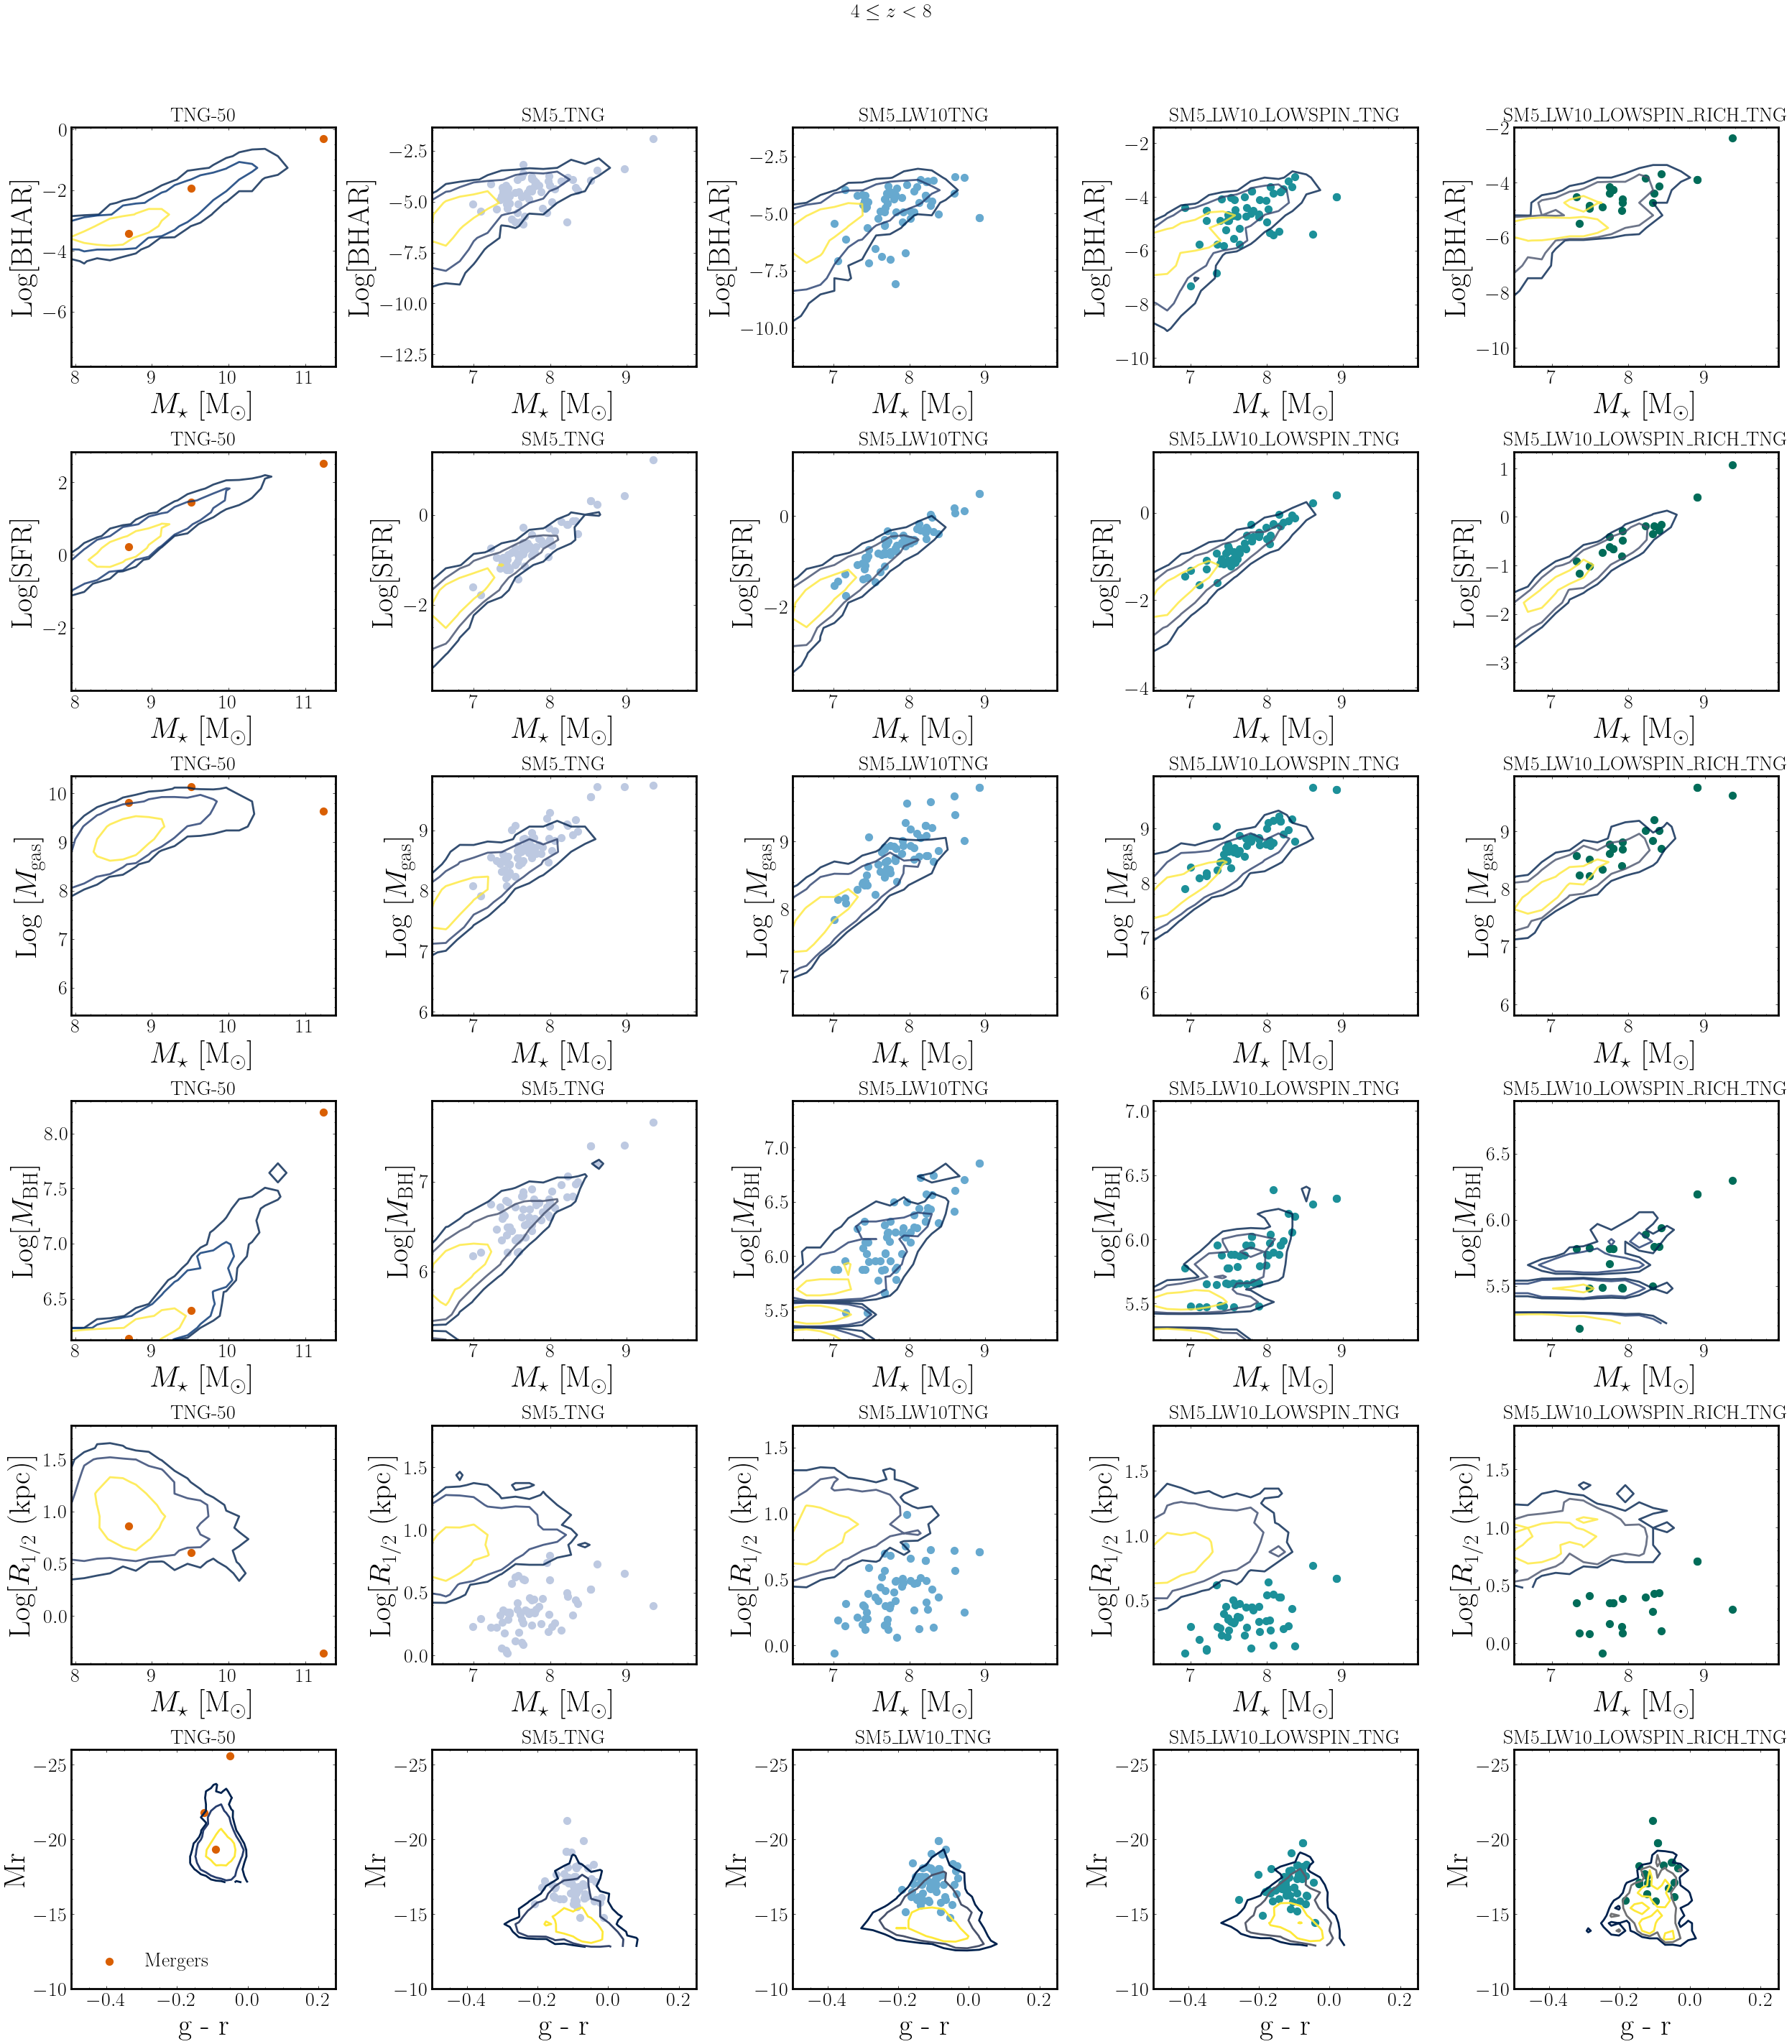

In [153]:
fig,axes = plt.subplots(6,5,figsize=(25,30))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=20)

quantities_list = ['MdotBH','SFR','MgasinRad','MBH','StellarHalfmassRadType']
quantities_list_mergers = ['Mdot_merging_pop','SFR_merging_pop','MgasInRad','MBH_merging_pop','StellarHalfmassRad_merging_pop']
quantities_labels = ['Log[BHAR]','Log[SFR]',r'Log [$M_{\rm gas}$]',r'Log[$M_{\rm BH}$]',r'Log[$R_{1/2}$ (kpc)]']
# quantities_list = ['sBHAR_merging_pop','Mdot_merging_pop','MBH_merging_pop','MgasInRad','fgas_progs','SFR_merging_pop','sSFR_merging_pop','Mstar_merging_pop']
# quantities_labels = ['Log[sBHAR]','Log[BHAR]',r'Log[$M_{\rm BH}$]',r'Log [$M_{\rm gas}$]',r'Log [$f_{\rm gas}$]','Log[SFR]','Log[sSFR]','Log[$M_{\star}$]']  

z_lower =4
z_upper =8

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,0],all_subhalos_objs['TNG50'], 'TNG-50','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,0],sim_objs['TNG50'],'TNG50',TNG_color,z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('TNG-50')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,1],all_subhalos_objs['SM5_TNG'], 'SM5_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,1],sim_objs['SM5_TNG'],'SM5_TNG',sim_colors[0],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,2],all_subhalos_objs['SM5_LW10_TNG'], 'SM5_LW10_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,2],sim_objs['SM5_LW10_TNG'],'SM5_LW10_TNG',sim_colors[1],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                       ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)    
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,3],all_subhalos_objs['SM5_LW10_LOWSPIN_TNG'], 'SM5_LW10_LOWSPIN_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,3],sim_objs['SM5_LW10_LOWSPIN_TNG'],'SM5_LW10_LOWSPIN_TNG',sim_colors[2],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_TNG')
#ax1.legend(loc="lower left")

for i,quantities in enumerate(quantities_list):
    ax1 = plot_property_vs_Mstar_for_z_interval_for_all_subhalos(axes[i,4],all_subhalos_objs['SM5_LW10_LOWSPIN_RICH_TNG'], 'SM5_LW10_LOWSPIN_RICH_TNG','#dfc27d', z_lower, z_upper, quantity_name=quantities, plot_log10=True,alpha=0.8)
    ax2 = plot_property_vs_Mstar_for_z_interval(axes[i,4],sim_objs['SM5_LW10_LOWSPIN_RICH_TNG'],'SM5_LW10_LOWSPIN_RICH_TNG',sim_colors[3],z_lower,z_upper,quantity_name=quantities_list_mergers[i]
                                            ,plot_log10=True,major_merger_mask=False,major_major_merger_mask=True,marker='o',size=50)
    ax1.set_ylabel(quantities_labels[i])
    ax1.set_title('SM5_LW10_LOWSPIN_RICH_TNG')
#ax1.legend(loc="lower left")

ax = plot_color_magnitude_diagram(axes[5,0],all_subhalos_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
ax = plot_color_magnitude_diagram(axes[5,0],sim_objs['TNG50'],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
ax.set_title('TNG-50')
ax.set_xlabel('g - r')
ax.set_ylabel('Mr')
ax.set_ylim(-26, -10)
ax.invert_yaxis()
ax.legend(loc='lower left')
ax.set_xlim(-0.5,0.25)


for i,sim in enumerate(sim_names[:-1]):
    ax = plot_color_magnitude_diagram(axes[5,i+1],all_subhalos_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='All',sim_color='#dfc27d',scatter=False,all_subhalos=True,contours=True,sim_size=50)
    ax = plot_color_magnitude_diagram(axes[5,i+1],sim_objs[sim],z_lower=z_lower,z_upper=z_upper,plot_name='Mergers',sim_color=sim_colors[i],scatter=True,all_subhalos=False,contours=False,sim_size=50)
    ax.set_title(sim)
    ax.set_xlabel('g - r')
    ax.set_ylabel('Mr')
    ax.set_ylim(-26, -10)
    ax.invert_yaxis()
    #ax.legend()
    ax.set_xlim(-0.5,0.25)
    

fig.suptitle(r"$4 \leq z < 8$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('../figures/TNG50_and_brahma_mergers_vs_allsubhalos_z4-8.pdf')

## Major and Minor mergers

In [83]:
def plot_property_vs_Mstar_for_z_and_mu(ax,sim_obj,sim_color,z_lower,z_upper,quantity_name
                                          ,plot_log10=True):

    z_mergers = sim_obj.z_merging_pop
    Mstar_mergers = sim_obj.Mstar_merging_pop
    minor_minor_merger_mask = sim_obj.q_merger < 0.1
    minor_merger_mask = sim_obj.q_merger < 0.25
    major_merger_mask = sim_obj.q_merger >= 0.1
    major_major_merger_mask = sim_obj.q_merger >= 0.25

    z_mask = (z_mergers >= z_lower) & (z_mergers < z_upper)
    Mstar_values = np.log10(Mstar_mergers)

    if quantity_name == "StellarHalfmassRad_merging_pop":
        #convert ckpc to kpc by multipyling scale factor
        
        r_half_major_merger = sim_obj.StellarHalfmassRad_merging_pop[major_major_merger_mask & z_mask]*(1/(1+z_mergers[major_major_merger_mask & z_mask]))
        r_half_minor_minor_merger = sim_obj.StellarHalfmassRad_merging_pop[minor_minor_merger_mask & z_mask]*(1/(1+z_mergers[minor_minor_merger_mask & z_mask]))
        r_half_minor_merger = sim_obj.StellarHalfmassRad_merging_pop[minor_merger_mask & z_mask]*(1/(1+z_mergers[minor_merger_mask & z_mask]))

        quantity_values_major_merger = r_half_major_merger
        quantity_values_minor_minor_merger = r_half_minor_minor_merger
        quantity_values_minor_merger = r_half_minor_merger

    else:
        quantity_values_major_merger = getattr(sim_obj,quantity_name)[major_major_merger_mask & z_mask]
        quantity_values_minor_minor_merger = getattr(sim_obj,quantity_name)[minor_minor_merger_mask & z_mask]
        quantity_values_minor_merger = getattr(sim_obj,quantity_name)[minor_merger_mask & z_mask]
    if plot_log10:
        quantity_values_major_merger = np.log10(quantity_values_major_merger)
        quantity_values_minor_minor_merger = np.log10(quantity_values_minor_minor_merger)
        quantity_values_minor_merger = np.log10(quantity_values_minor_merger)

    #scatter plot
    ax.scatter(Mstar_values[major_major_merger_mask&z_mask],quantity_values_major_merger,color="blue",alpha=0.5,label=r"$\mu \geq 0.25$",marker="^")
    ax.scatter(Mstar_values[minor_merger_mask&z_mask],quantity_values_minor_merger,color="red",alpha=0.5,label=r"$ \mu < 0.25$",marker="v")
    ax.scatter(Mstar_values[minor_minor_merger_mask&z_mask],quantity_values_minor_minor_merger,color="black",alpha=0.5,label=r"$\mu < 0.1$",marker="+")
    ax.set_xlabel(r'$M_{\star}$ [M$_{\odot}$]')
    return ax

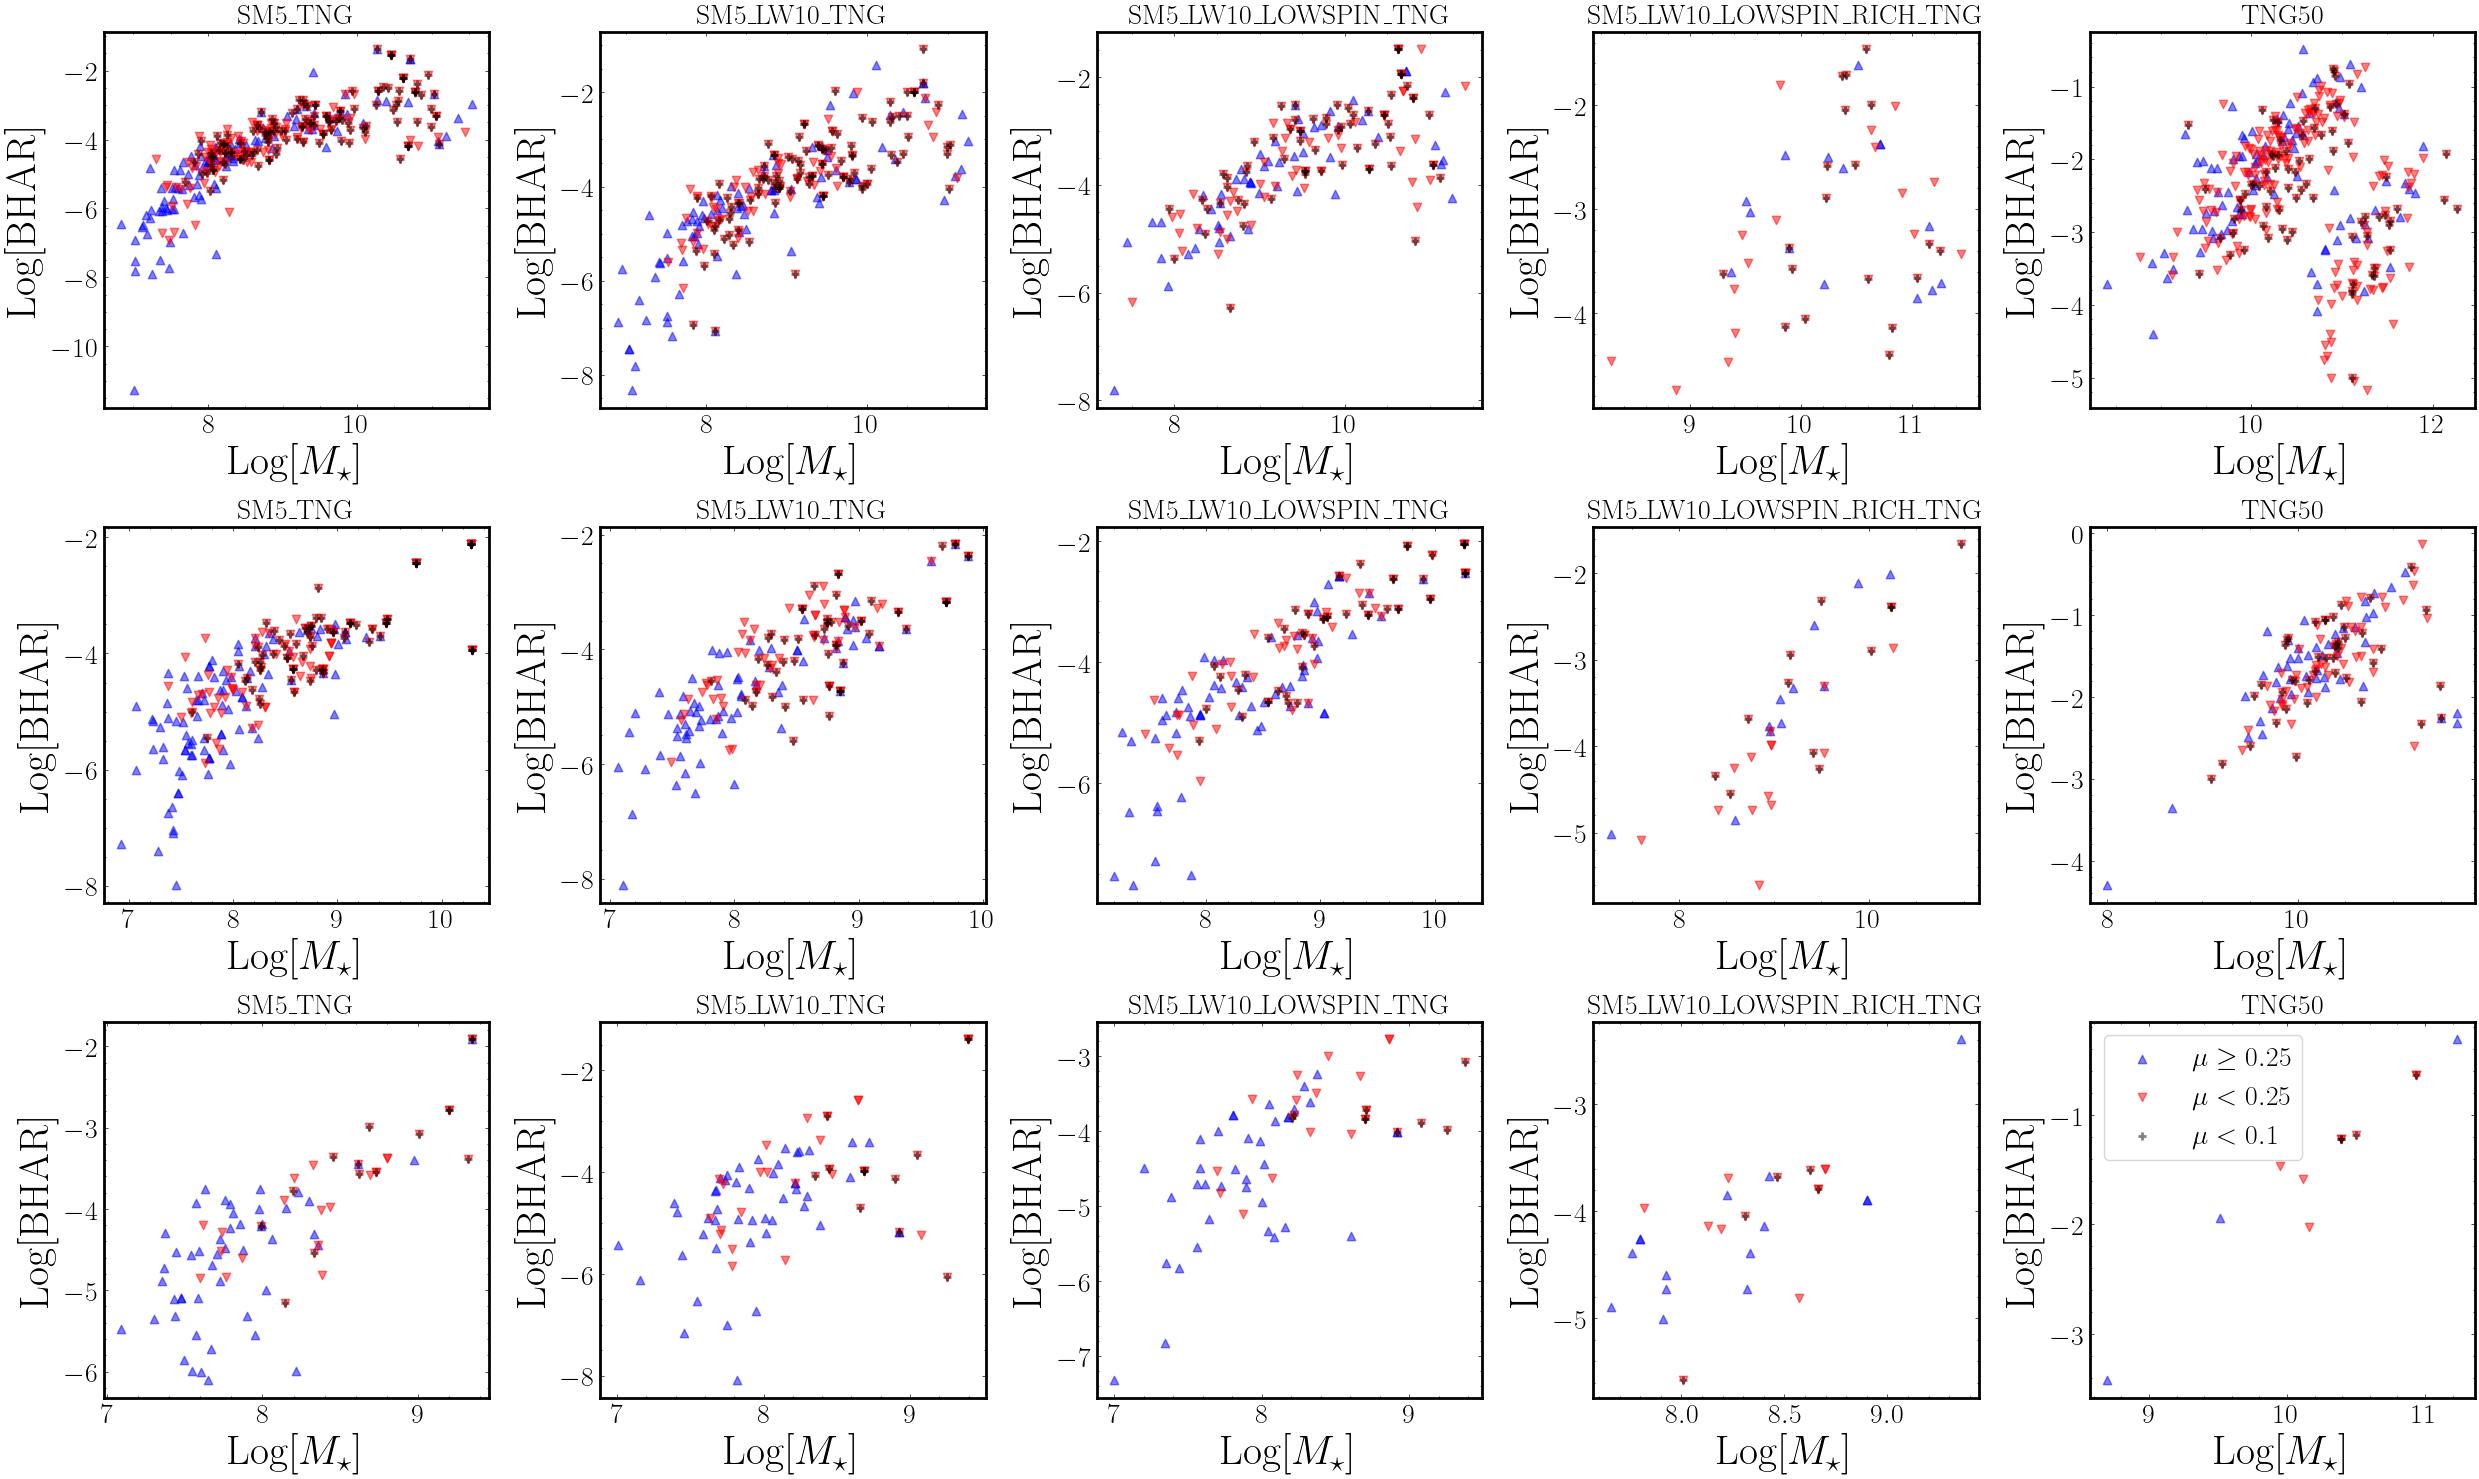

In [84]:
fig,axes = plt.subplots(3,5,figsize=(25,15))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=20)

quantities = 'Mdot_merging_pop'
quantities_labels = 'Log[BHAR]'

z_lower =0
z_upper =2

for j,sims in enumerate(sim_names):
    ax = plot_property_vs_Mstar_for_z_and_mu(axes[0,j],sim_objs[sims],sim_colors[j],z_lower,z_upper,quantity_name=quantities
                                               ,plot_log10=True)
    ax.set_ylabel(quantities_labels)
    ax.set_xlabel(r'Log[$M_{\star}$]')
    ax.set_title(sims)


z_lower =2
z_upper =4

for j,sims in enumerate(sim_names):
    ax = plot_property_vs_Mstar_for_z_and_mu(axes[1,j],sim_objs[sims],sim_colors[j],z_lower,z_upper,quantity_name=quantities
                                               ,plot_log10=True)
    ax.set_ylabel(quantities_labels)
    ax.set_xlabel(r'Log[$M_{\star}$]')
    ax.set_title(sims)

z_lower =4
z_upper =6

for j,sims in enumerate(sim_names):
    ax = plot_property_vs_Mstar_for_z_and_mu(axes[2,j],sim_objs[sims],sim_colors[j],z_lower,z_upper,quantity_name=quantities
                                               ,plot_log10=True)
    ax.set_ylabel(quantities_labels)
    ax.set_xlabel(r'Log[$M_{\star}$]')
    ax.set_title(sims)
ax.legend(frameon=True)

fig.tight_layout()

/tmp/ipykernel_3147093/2130584981.py:30: RuntimeWarning: divide by zero encountered in log10
  quantity_values_major_merger = np.log10(quantity_values_major_merger)


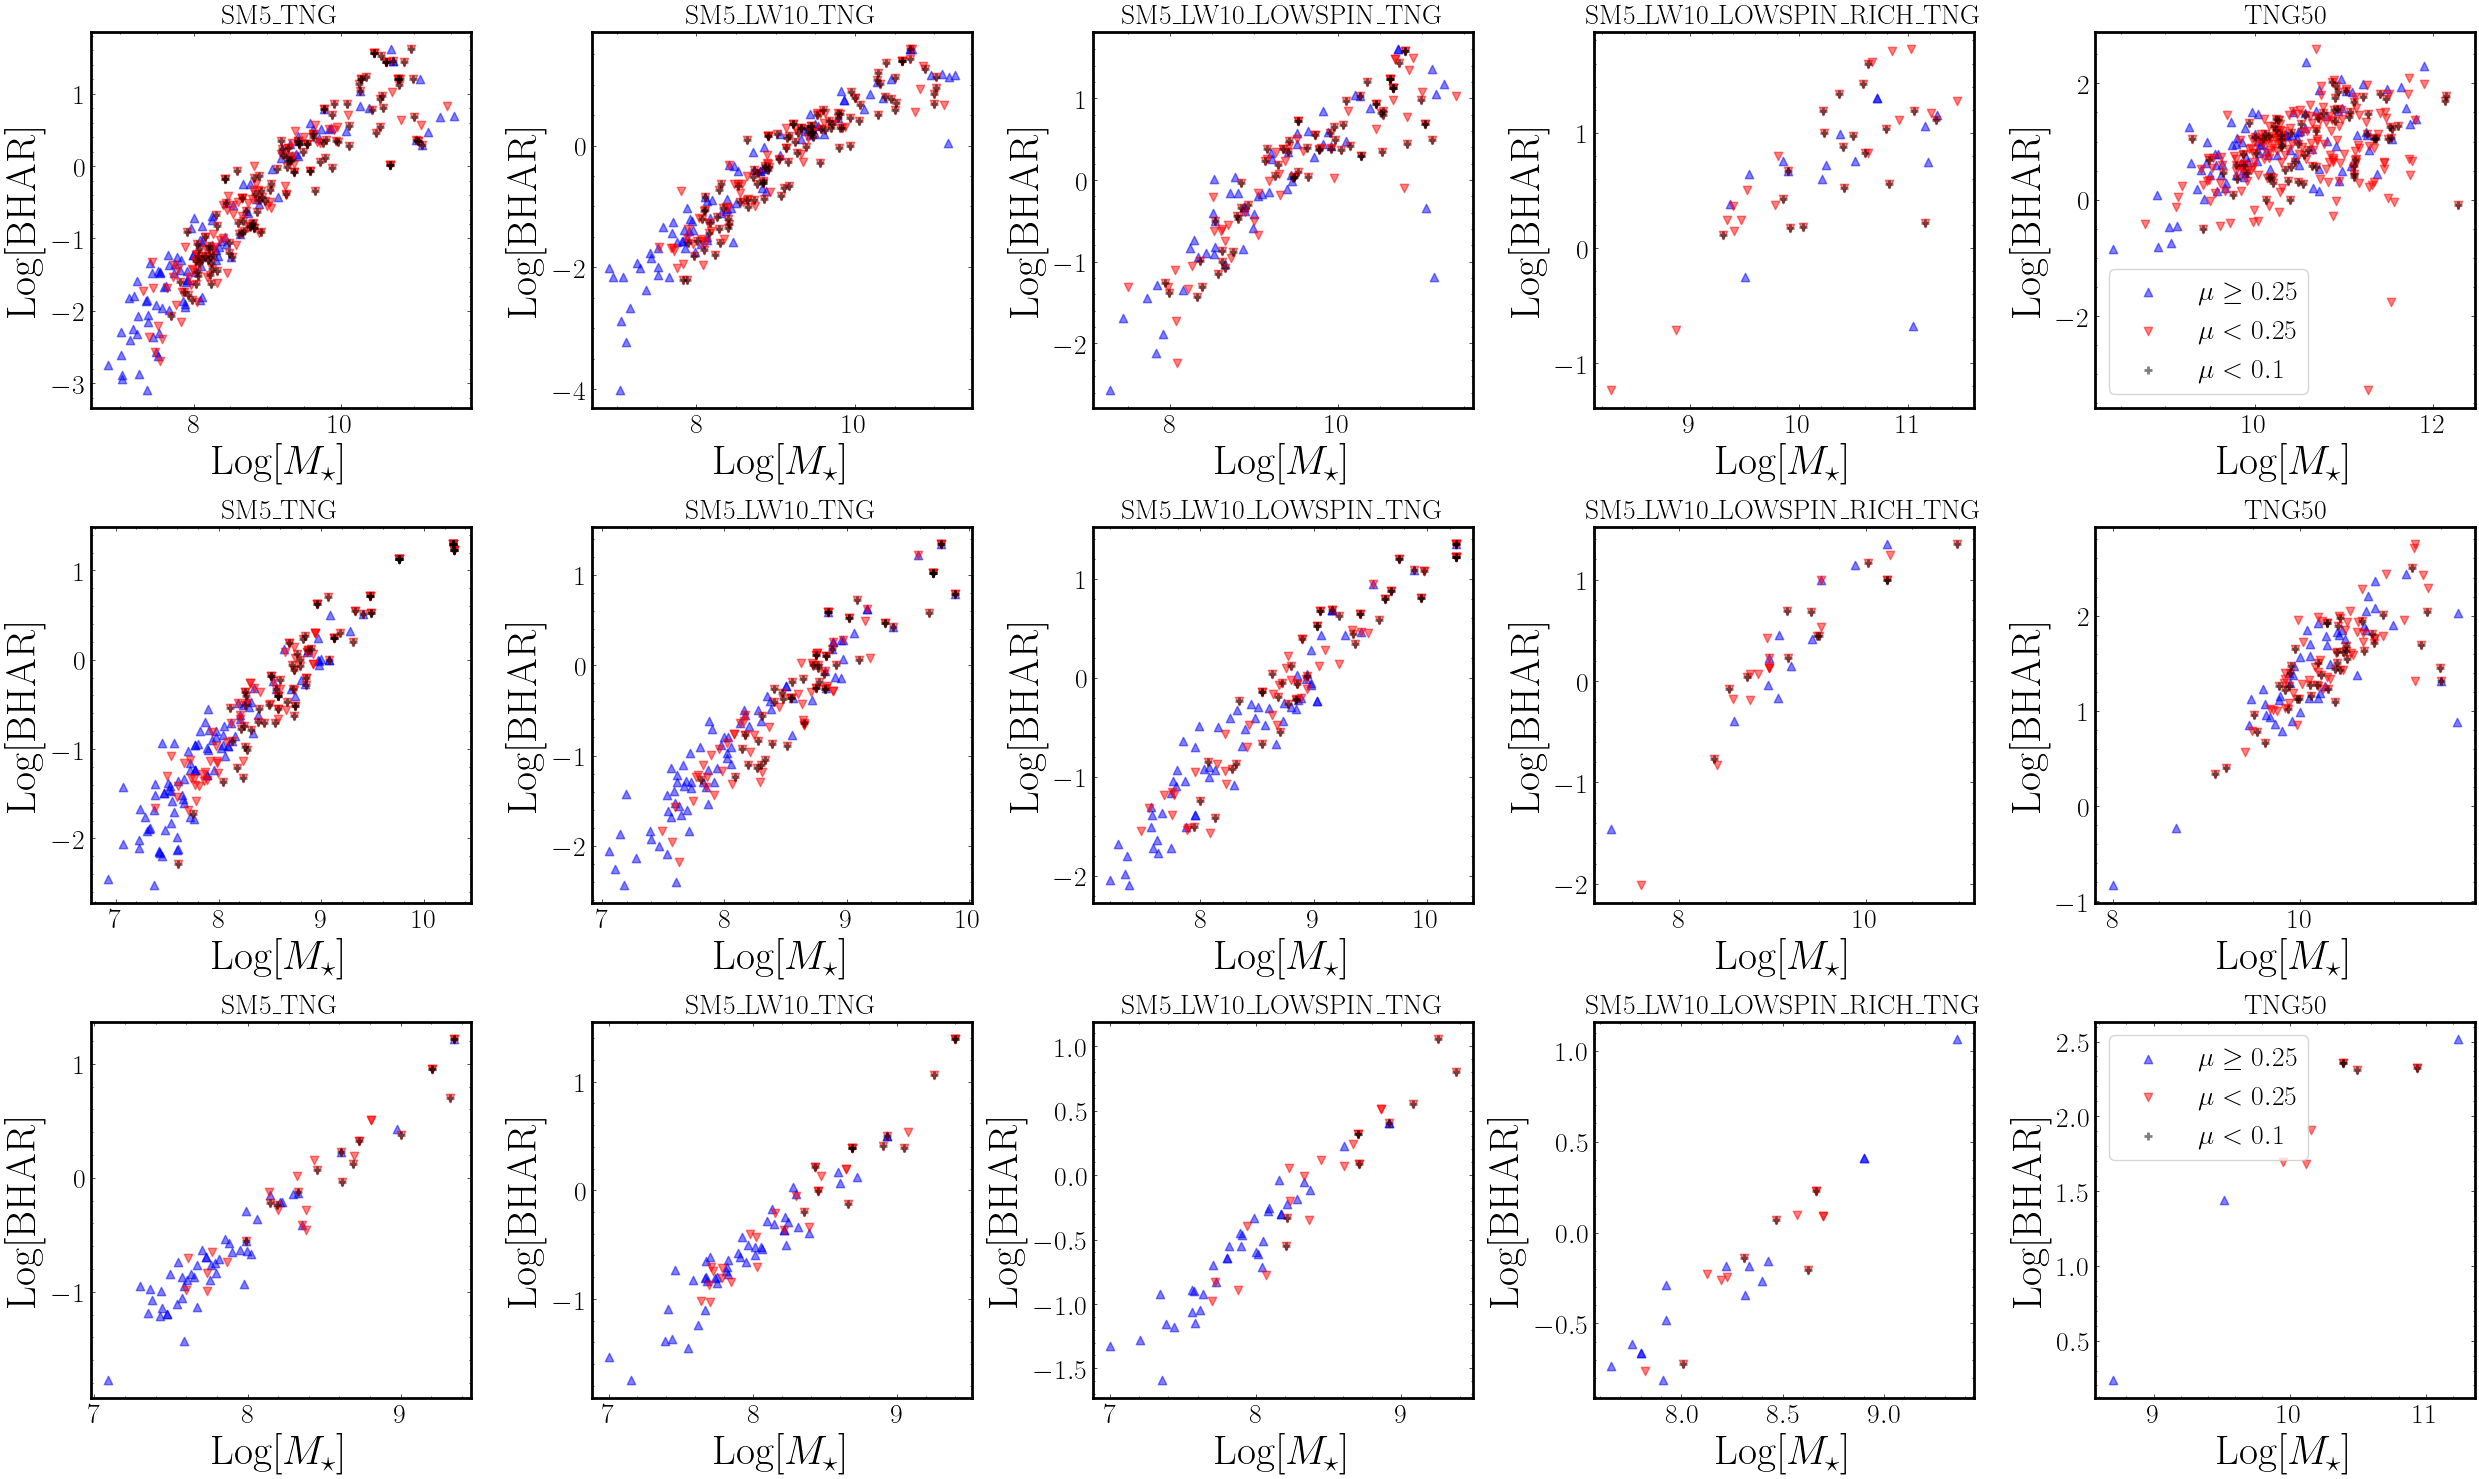

In [85]:
fig,axes = plt.subplots(3,5,figsize=(25,15))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=20)

quantities = 'SFR_merging_pop'
quantities_labels = 'Log[BHAR]'

z_lower =0
z_upper =2

for j,sims in enumerate(sim_names):
    ax = plot_property_vs_Mstar_for_z_and_mu(axes[0,j],sim_objs[sims],sim_colors[j],z_lower,z_upper,quantity_name=quantities
                                               ,plot_log10=True)
    ax.set_ylabel(quantities_labels)
    ax.set_xlabel(r'Log[$M_{\star}$]')
    ax.set_title(sims)
ax.legend(frameon=True)

z_lower =2
z_upper =4

for j,sims in enumerate(sim_names):
    ax = plot_property_vs_Mstar_for_z_and_mu(axes[1,j],sim_objs[sims],sim_colors[j],z_lower,z_upper,quantity_name=quantities
                                               ,plot_log10=True)
    ax.set_ylabel(quantities_labels)
    ax.set_xlabel(r'Log[$M_{\star}$]')
    ax.set_title(sims)

z_lower =4
z_upper =6

for j,sims in enumerate(sim_names):
    ax = plot_property_vs_Mstar_for_z_and_mu(axes[2,j],sim_objs[sims],sim_colors[j],z_lower,z_upper,quantity_name=quantities
                                               ,plot_log10=True)
    ax.set_ylabel(quantities_labels)
    ax.set_xlabel(r'Log[$M_{\star}$]')
    ax.set_title(sims)
ax.legend(frameon=True)

fig.tight_layout()